In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [2]:
double_train = pd.read_csv("../final_dataset/double/double_train.csv")
double_valid = pd.read_csv("../final_dataset/double/double_valid.csv")
double_test = pd.read_csv("../final_dataset/double/double_test.csv")

In [3]:
feature_columns = double_train.columns[1:-1]

X_double_train = double_train[feature_columns].values
Y_double_train = double_train['Label'].values

X_double_valid = double_valid[feature_columns].values
Y_double_valid = double_valid['Label'].values

X_double_test = double_test[feature_columns].values
Y_double_test = double_test['Label'].values

In [4]:
double_scaler = StandardScaler()

X_double_train = double_scaler.fit_transform(X_double_train)
X_double_valid = double_scaler.transform(X_double_valid)
X_double_test = double_scaler.transform(X_double_test)

Y_double_train = Y_double_train.astype(int)
Y_double_valid = Y_double_valid.astype(int)
Y_double_test = Y_double_test.astype(int)

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score

def print_classification_result(result_df, model_name, data_type, y_true, y_pred, y_pred_prob):
    # 정확도
    accuracy = accuracy_score(y_true, y_pred)
    
    # 정밀도 (단일 스칼라 값)
    precision = precision_score(y_true, y_pred, average='weighted')  
    
    # 재현율 (단일 스칼라 값)
    recall = recall_score(y_true, y_pred, average='weighted')  
    
    # F1 점수 (단일 스칼라 값)
    f1 = f1_score(y_true, y_pred, average='weighted')  
    
    # AUC Score 계산
    auc_score = roc_auc_score(y_true, y_pred_prob[:, 1])
    
    # PR Score 계산
    pr_score = average_precision_score(y_true, y_pred_prob[:, 1])
    
    # 결과 저장 (각 지표의 단일 값 저장)
    result_df.loc[len(result_df)] = [
        model_name,
        data_type,
        accuracy,
        precision,
        recall,
        f1,
        auc_score,
        pr_score
    ]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

   

model = Sequential()
model.add(LSTM(100, input_shape=(X_double_train.shape[1], 1), return_sequences=True))  # 첫 번째 LSTM 레이어
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))  # 두 번째 LSTM 레이어
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

 

2024-09-20 22:04:44.000781: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-20 22:04:44.067505: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 22:04:44.067554: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 22:04:44.067564: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 22:04:44.081269: I tensorflow/core/platform/cpu_feature_g

In [7]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_double_train, Y_double_train, epochs=50, batch_size=32, validation_data=(X_double_valid, Y_double_valid)) 

Epoch 1/50


2024-09-20 22:04:53.167635: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-09-20 22:04:55.344692: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f14ac3a5980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-20 22:04:55.344744: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-09-20 22:04:55.351649: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-20 22:04:55.551627: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


102/102 [==============================] - 9s 21ms/step - loss: 0.5496 - accuracy: 0.7208 - val_loss: 0.5106 - val_accuracy: 0.7410
Epoch 2/50
102/102 [==============================] - 1s 12ms/step - loss: 0.4597 - accuracy: 0.7944 - val_loss: 0.4910 - val_accuracy: 0.7600
Epoch 3/50
102/102 [==============================] - 1s 11ms/step - loss: 0.4327 - accuracy: 0.7910 - val_loss: 0.4695 - val_accuracy: 0.7616
Epoch 4/50
102/102 [==============================] - 1s 11ms/step - loss: 0.4132 - accuracy: 0.8128 - val_loss: 0.4454 - val_accuracy: 0.7690
Epoch 5/50
102/102 [==============================] - 1s 11ms/step - loss: 0.4118 - accuracy: 0.8036 - val_loss: 0.4601 - val_accuracy: 0.7674
Epoch 6/50
102/102 [==============================] - 1s 11ms/step - loss: 0.3851 - accuracy: 0.8214 - val_loss: 0.4423 - val_accuracy: 0.7637
Epoch 7/50
102/102 [==============================] - 2s 15ms/step - loss: 0.3690 - accuracy: 0.8239 - val_loss: 0.4280 - val_accuracy: 0.7869
Epoch 8/50

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

# 예측
y_pred = model.predict(X_double_train)

# 예측 확률을 이진 레이블로 변환
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(Y_double_train, y_pred_binary)

# Weighted Precision
weighted_precision = precision_score(Y_double_train, y_pred_binary)

# Weighted Recall
weighted_recall = recall_score(Y_double_train, y_pred_binary)

# Weighted F1 Score
weighted_f1 = f1_score(Y_double_train, y_pred_binary)

# AUC Score
auc_score = roc_auc_score(Y_double_train, y_pred)

# PR Curve의 평균 정밀도 점수 계산
pr_score = average_precision_score(Y_double_train, y_pred)

print("---------------------------valid--------------------------")
print(f'Accuracy: {accuracy}')
print(f'Precision: {weighted_precision}')
print(f'Recall: {weighted_recall}')
print(f'F1 Score: {weighted_f1}')
print(f'AUC Score: {auc_score}')
print(f'PR Score: {pr_score}')


102/102 [==============================] - 2s 4ms/step
---------------------------valid--------------------------
Accuracy: 0.9521325559987727
Precision: 0.9700460829493087
Recall: 0.941834451901566
F1 Score: 0.9557321225879682
AUC Score: 0.992574182137279
PR Score: 0.9940730187138296


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

# 예측
y_pred = model.predict(X_double_valid)

# 예측 확률을 이진 레이블로 변환
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(Y_double_valid, y_pred_binary)

# Weighted Precision
weighted_precision = precision_score(Y_double_valid, y_pred_binary)

# Weighted Recall
weighted_recall = recall_score(Y_double_valid, y_pred_binary)

# Weighted F1 Score
weighted_f1 = f1_score(Y_double_valid, y_pred_binary)

# AUC Score
auc_score = roc_auc_score(Y_double_valid, y_pred)

# PR Curve의 평균 정밀도 점수 계산
pr_score = average_precision_score(Y_double_valid, y_pred)

print("---------------------------valid--------------------------")
print(f'Accuracy: {accuracy}')
print(f'Precision: {weighted_precision}')
print(f'Recall: {weighted_recall}')
print(f'F1 Score: {weighted_f1}')
print(f'AUC Score: {auc_score}')
print(f'PR Score: {pr_score}')


60/60 [==============================] - 0s 3ms/step
---------------------------valid--------------------------
Accuracy: 0.7869198312236287
Precision: 0.8189749182115594
Recall: 0.7593528816986855
F1 Score: 0.7880377754459601
AUC Score: 0.9034751617294094
PR Score: 0.9206479799885856


In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix


# 예측
y_pred = model.predict(X_double_test)

# 예측 확률을 이진 레이블로 변환
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(Y_double_test, y_pred_binary)

# Weighted Precision
weighted_precision = precision_score(Y_double_test, y_pred_binary)

# Weighted Recall
weighted_recall = recall_score(Y_double_test, y_pred_binary)

# Weighted F1 Score
weighted_f1 = f1_score(Y_double_test, y_pred_binary)

# AUC Score
auc_score = roc_auc_score(Y_double_test, y_pred)

# PR Curve의 평균 정밀도 점수 계산
pr_score = average_precision_score(Y_double_test, y_pred)

print("---------------------------valid--------------------------")
print(f'Accuracy: {accuracy}')
print(f'Precision: {weighted_precision}')
print(f'Recall: {weighted_recall}')
print(f'F1 Score: {weighted_f1}')
print(f'AUC Score: {auc_score}')
print(f'PR Score: {pr_score}')


67/67 [==============================] - 0s 4ms/step
---------------------------valid--------------------------
Accuracy: 0.8702218027371401
Precision: 0.8617950754567116
Recall: 0.9148397976391232
F1 Score: 0.8875255623721882
AUC Score: 0.9525221908330305
PR Score: 0.9589457978541756


In [23]:
# 혼동 행렬 시각화를 위한 함수 정의
def plot_confusion_matrix(model_name, true_labels, predictions):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

67/67 [==============================] - 0s 4ms/step


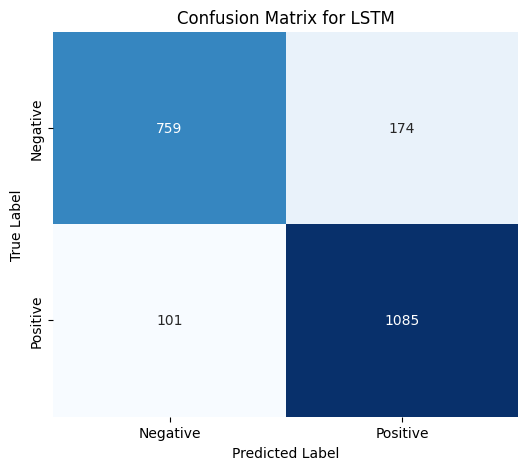

In [24]:
# 테스트 데이터에 대한 예측
test_pred_prob = model.predict(X_double_test)  # 확률값 반환
    
# 확률을 클래스 레이블로 변환 (0.5 임계값 사용)
test_pred = (test_pred_prob >= 0.5).astype(int)

# 혼동 행렬 시각화
plot_confusion_matrix("LSTM", Y_double_test, test_pred)

In [11]:
lstm_pred_prob = model.predict(X_double_test)
np.save('../ml_models/pred_prob/lstm_pred_prob_double.npy', lstm_pred_prob)  # .npy 파일로 저장

67/67 [==============================] - 0s 4ms/step


In [12]:
test_1 = pd.read_csv("../final_dataset/each_test/double/A_D_11.csv")
test_2 = pd.read_csv("../final_dataset/each_test/double/B_D_11.csv")
test_3 = pd.read_csv("../final_dataset/each_test/double/C_D_11.csv")
test_4 = pd.read_csv("../final_dataset/each_test/double/D_D_11.csv")
test_5 = pd.read_csv("../final_dataset/each_test/double/E_D_11.csv")
test_6 = pd.read_csv("../final_dataset/each_test/double/F_D_11.csv")
test_7 = pd.read_csv("../final_dataset/each_test/double/G_D_11.csv")
test_8 = pd.read_csv("../final_dataset/each_test/double/H_D_11.csv")
test_9 = pd.read_csv("../final_dataset/each_test/double/I_D_11.csv")
test_10 = pd.read_csv("../final_dataset/each_test/double/J_D_11.csv")

In [13]:
# feature_columns 정의
feature_columns = test_1.columns[1:-1]  # 모든 test 파일에 동일한 컬럼 구조라고 가정

# 각 test 데이터에 대해 feature와 label 추출
X_test_1 = test_1[feature_columns].values
Y_test_1 = test_1['Label'].values

X_test_2 = test_2[feature_columns].values
Y_test_2 = test_2['Label'].values

X_test_3 = test_3[feature_columns].values
Y_test_3 = test_3['Label'].values

X_test_4 = test_4[feature_columns].values
Y_test_4 = test_4['Label'].values

X_test_5 = test_5[feature_columns].values
Y_test_5 = test_5['Label'].values

X_test_6 = test_6[feature_columns].values
Y_test_6 = test_6['Label'].values

X_test_7 = test_7[feature_columns].values
Y_test_7 = test_7['Label'].values

X_test_8 = test_8[feature_columns].values
Y_test_8 = test_8['Label'].values

X_test_9 = test_9[feature_columns].values
Y_test_9 = test_9['Label'].values

X_test_10 = test_10[feature_columns].values
Y_test_10 = test_10['Label'].values

In [14]:
# Scaler 적용 및 데이터 형 변환을 처리하는 함수 정의
def process_test_data(X_test, Y_test, scaler):
    # 데이터 스케일링
    X_test_scaled = scaler.transform(X_test)
    
    # int 타입으로 변환
    Y_test = Y_test.astype(int)
    
    return X_test_scaled, Y_test


In [15]:
# X_single_train, X_single_valid, X_single_test의 스케일러로 test 데이터 변환
X_test_1, Y_test_1 = process_test_data(X_test_1, Y_test_1, double_scaler)
X_test_2, Y_test_2 = process_test_data(X_test_2, Y_test_2, double_scaler)
X_test_3, Y_test_3 = process_test_data(X_test_3, Y_test_3, double_scaler)
X_test_4, Y_test_4 = process_test_data(X_test_4, Y_test_4, double_scaler)
X_test_5, Y_test_5 = process_test_data(X_test_5, Y_test_5, double_scaler)
X_test_6, Y_test_6 = process_test_data(X_test_6, Y_test_6, double_scaler)
X_test_7, Y_test_7 = process_test_data(X_test_7, Y_test_7, double_scaler)
X_test_8, Y_test_8 = process_test_data(X_test_8, Y_test_8, double_scaler)
X_test_9, Y_test_9 = process_test_data(X_test_9, Y_test_9, double_scaler)
X_test_10, Y_test_10 = process_test_data(X_test_10, Y_test_10, double_scaler)

In [16]:
import os

# 모델을 사용하여 예측 및 점프수 계산을 반복적으로 수행하는 함수
def process_and_visualize(test_data, Y_test, model, model_name, test_name, output_dir):
    
    # 테스트 데이터에 대한 예측
    predictions = model.predict(test_data)
    
    # 이동 평균을 계산하여 예측값 부드럽게 만들기
    smoothed_predictions = np.convolve(predictions.squeeze(), np.ones(5)/5, mode='same')
    
    # 테스트 데이터에 대한 예측 결과를 바이너리 형태로 변환
    binary_predictions = (smoothed_predictions > 0.5).astype(int)
    
    # 0에서 1로 바뀌는 구간에서 줄넘기 개수 카운트
    jump_count = np.sum(np.diff(binary_predictions.flatten()) > 0)
    
    # 예측 결과 시각화
    plt.plot(Y_test, label='Actual')
    plt.plot(binary_predictions.flatten(), label='Predicted')
    plt.title(f'Actual vs Predicted for {test_name} player using {model_name}')  
    plt.xlabel('Data Point')
    plt.ylabel('Label')
    plt.legend()
    plt.savefig(os.path.join(output_dir, f'{model_name}_predictions_{test_name}.png'))
    plt.close()  # 현재 플롯 닫기



In [17]:
test_data_list = [
    (X_test_1, Y_test_1, "A"),
    (X_test_2, Y_test_2, "B"),
    (X_test_3, Y_test_3, "C"),
    (X_test_4, Y_test_4, "D"),
    (X_test_5, Y_test_5, "E"),
    (X_test_6, Y_test_6, "F"),
    (X_test_7, Y_test_7, "G"),
    (X_test_8, Y_test_8, "H"),
    (X_test_9, Y_test_9, "I"),
    (X_test_10, Y_test_10, "J")
]

In [18]:
# 결과를 저장할 디렉토리 생성
output_dir = '../double_model_predictions'

  
# 각 테스트 데이터에 대해 process_and_visualize 호출
for test_data, Y_test, test_name in test_data_list:
    # 예측 결과 시각화 및 이미지로 저장
    process_and_visualize(test_data, Y_test, model, "LSTM", test_name, output_dir)
        
        

7/7 [==============================] - 0s 5ms/step


In [19]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# X_single_train을 3D에서 2D로 변환
X_single_test_reshaped = X_double_test.reshape(X_double_test.shape[0], -1)  # (samples, features)

# KMeans를 사용하여 배경 데이터 샘플링
background_samples = shap.kmeans(X_single_test_reshaped, k=10)  # K=100으로 샘플 수를 줄임

# SHAP 설명자 생성
explainer = shap.KernelExplainer(model.predict, background_samples)

# X_single_test를 3D에서 2D로 변환
X_single_test_reshaped = X_double_test.reshape(X_double_test.shape[0], -1)  # (samples, features)

# SHAP 값 계산
shap_values = explainer.shap_values(X_single_test_reshaped)


/root/anaconda3/envs/jw_tensorflow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1/1 [==============================] - 0s 72ms/step


  0%|          | 0/2119 [00:00<?, ?it/s]

657/657 [==============================] - 3s 4ms/step


  0%|          | 1/2119 [00:05<3:28:25,  5.90s/it]

657/657 [==============================] - 3s 5ms/step


  0%|          | 2/2119 [00:11<3:29:10,  5.93s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 3/2119 [00:16<3:04:01,  5.22s/it]

657/657 [==============================] - 3s 5ms/step


  0%|          | 4/2119 [00:22<3:12:20,  5.46s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 5/2119 [00:27<3:17:52,  5.62s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 6/2119 [00:33<3:21:02,  5.71s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 7/2119 [00:39<3:22:22,  5.75s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 8/2119 [00:43<2:58:57,  5.09s/it]

657/657 [==============================] - 2s 4ms/step


  0%|          | 9/2119 [00:49<3:05:47,  5.28s/it]

657/657 [==============================] - 2s 3ms/step


  0%|          | 10/2119 [00:54<3:11:05,  5.44s/it]

657/657 [==============================] - 3s 5ms/step


  1%|          | 11/2119 [00:58<2:55:39,  5.00s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 12/2119 [01:02<2:39:35,  4.54s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 13/2119 [01:07<2:50:48,  4.87s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 14/2119 [01:13<3:00:07,  5.13s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 15/2119 [01:17<2:41:05,  4.59s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 16/2119 [01:20<2:28:41,  4.24s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 17/2119 [01:26<2:44:38,  4.70s/it]

657/657 [==============================] - 2s 3ms/step


  1%|          | 18/2119 [01:29<2:27:32,  4.21s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 19/2119 [01:32<2:20:22,  4.01s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 20/2119 [01:36<2:12:51,  3.80s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 21/2119 [01:41<2:32:29,  4.36s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 22/2119 [01:47<2:47:31,  4.79s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 23/2119 [01:50<2:32:19,  4.36s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 24/2119 [01:54<2:21:23,  4.05s/it]

657/657 [==============================] - 2s 3ms/step


  1%|          | 25/2119 [02:00<2:40:38,  4.60s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 26/2119 [02:06<2:53:44,  4.98s/it]

657/657 [==============================] - 3s 4ms/step


  1%|▏         | 27/2119 [02:11<3:00:51,  5.19s/it]

657/657 [==============================] - 2s 3ms/step


  1%|▏         | 28/2119 [02:17<3:07:32,  5.38s/it]

657/657 [==============================] - 2s 4ms/step


  1%|▏         | 29/2119 [02:21<2:48:29,  4.84s/it]

657/657 [==============================] - 2s 3ms/step


  1%|▏         | 30/2119 [02:26<2:58:24,  5.12s/it]

657/657 [==============================] - 2s 4ms/step


  1%|▏         | 31/2119 [02:32<3:07:17,  5.38s/it]

657/657 [==============================] - 2s 3ms/step


  2%|▏         | 32/2119 [02:38<3:10:38,  5.48s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 33/2119 [02:41<2:48:35,  4.85s/it]

657/657 [==============================] - 2s 3ms/step


  2%|▏         | 34/2119 [02:47<2:57:28,  5.11s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 35/2119 [02:53<3:06:05,  5.36s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 36/2119 [02:59<3:10:25,  5.49s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 37/2119 [03:02<2:47:12,  4.82s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 38/2119 [03:08<2:58:29,  5.15s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 39/2119 [03:14<3:06:23,  5.38s/it]

657/657 [==============================] - 2s 3ms/step


  2%|▏         | 40/2119 [03:20<3:09:29,  5.47s/it]

657/657 [==============================] - 2s 3ms/step


  2%|▏         | 41/2119 [03:23<2:46:56,  4.82s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 42/2119 [03:29<2:56:58,  5.11s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 43/2119 [03:35<3:03:03,  5.29s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 44/2119 [03:38<2:46:13,  4.81s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 45/2119 [03:42<2:34:39,  4.47s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 46/2119 [03:46<2:25:49,  4.22s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 47/2119 [03:51<2:43:07,  4.72s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 48/2119 [03:57<2:53:43,  5.03s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 49/2119 [04:01<2:37:25,  4.56s/it]

657/657 [==============================] - 2s 3ms/step


  2%|▏         | 50/2119 [04:06<2:50:06,  4.93s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 51/2119 [04:10<2:35:38,  4.52s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 52/2119 [04:16<2:47:31,  4.86s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 53/2119 [04:21<2:57:38,  5.16s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 54/2119 [04:27<3:03:12,  5.32s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 55/2119 [04:33<3:08:19,  5.47s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 56/2119 [04:39<3:15:17,  5.68s/it]

657/657 [==============================] - 3s 5ms/step


  3%|▎         | 57/2119 [04:45<3:19:22,  5.80s/it]

657/657 [==============================] - 3s 5ms/step


  3%|▎         | 58/2119 [04:50<3:06:14,  5.42s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 59/2119 [04:56<3:09:46,  5.53s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 60/2119 [05:01<3:12:16,  5.60s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 61/2119 [05:05<2:49:26,  4.94s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 62/2119 [05:10<2:56:49,  5.16s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 63/2119 [05:14<2:38:58,  4.64s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 64/2119 [05:20<2:50:22,  4.97s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 65/2119 [05:23<2:35:14,  4.53s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 66/2119 [05:29<2:48:16,  4.92s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 67/2119 [05:32<2:33:30,  4.49s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 68/2119 [05:36<2:24:55,  4.24s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 69/2119 [05:42<2:39:36,  4.67s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 70/2119 [05:45<2:25:39,  4.27s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 71/2119 [05:48<2:14:32,  3.94s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 72/2119 [05:52<2:09:57,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 73/2119 [05:55<2:04:04,  3.64s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 74/2119 [05:58<1:58:48,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▎         | 75/2119 [06:01<1:56:40,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▎         | 76/2119 [06:07<2:18:48,  4.08s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▎         | 77/2119 [06:10<2:10:25,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▎         | 78/2119 [06:13<2:01:28,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▎         | 79/2119 [06:19<2:22:07,  4.18s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 80/2119 [06:24<2:35:48,  4.58s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 81/2119 [06:30<2:47:58,  4.95s/it]

657/657 [==============================] - 3s 4ms/step


  4%|▍         | 82/2119 [06:33<2:30:43,  4.44s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 83/2119 [06:39<2:46:19,  4.90s/it]

657/657 [==============================] - 3s 5ms/step


  4%|▍         | 84/2119 [06:45<2:56:44,  5.21s/it]

657/657 [==============================] - 3s 4ms/step


  4%|▍         | 85/2119 [06:49<2:40:12,  4.73s/it]

657/657 [==============================] - 3s 4ms/step


  4%|▍         | 86/2119 [06:52<2:26:05,  4.31s/it]

657/657 [==============================] - 3s 4ms/step


  4%|▍         | 87/2119 [06:56<2:15:27,  4.00s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 88/2119 [06:59<2:07:36,  3.77s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 89/2119 [07:02<2:03:25,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 90/2119 [07:05<1:57:00,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 91/2119 [07:08<1:54:53,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 92/2119 [07:14<2:16:28,  4.04s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 93/2119 [07:20<2:32:04,  4.50s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 94/2119 [07:23<2:19:50,  4.14s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 95/2119 [07:26<2:11:07,  3.89s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 96/2119 [07:29<2:04:23,  3.69s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 97/2119 [07:33<1:59:18,  3.54s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▍         | 98/2119 [07:36<1:57:00,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 99/2119 [07:41<2:17:56,  4.10s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 100/2119 [07:45<2:09:43,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 101/2119 [07:48<2:02:29,  3.64s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 102/2119 [07:51<1:59:02,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 103/2119 [07:54<1:54:17,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 104/2119 [07:58<1:53:43,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 105/2119 [08:01<1:53:00,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 106/2119 [08:04<1:54:07,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 107/2119 [08:08<1:52:17,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 108/2119 [08:11<1:50:53,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▌         | 109/2119 [08:14<1:50:20,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 110/2119 [08:20<2:14:25,  4.01s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 111/2119 [08:25<2:29:48,  4.48s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 112/2119 [08:28<2:15:38,  4.06s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▌         | 113/2119 [08:32<2:08:57,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 114/2119 [08:35<2:03:33,  3.70s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▌         | 115/2119 [08:38<2:00:16,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 116/2119 [08:42<1:55:01,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


  6%|▌         | 117/2119 [08:45<1:52:58,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 118/2119 [08:48<1:52:16,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 119/2119 [08:51<1:51:29,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 120/2119 [08:57<2:14:21,  4.03s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 121/2119 [09:00<2:06:48,  3.81s/it]

657/657 [==============================] - 3s 4ms/step


  6%|▌         | 122/2119 [09:04<2:00:16,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 123/2119 [09:07<1:56:13,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 124/2119 [09:12<2:18:09,  4.16s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 125/2119 [09:15<2:06:34,  3.81s/it]

657/657 [==============================] - 3s 4ms/step


  6%|▌         | 126/2119 [09:19<2:03:23,  3.71s/it]

657/657 [==============================] - 2s 3ms/step


  6%|▌         | 127/2119 [09:25<2:21:52,  4.27s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 128/2119 [09:28<2:10:41,  3.94s/it]

657/657 [==============================] - 3s 4ms/step


  6%|▌         | 129/2119 [09:31<2:03:56,  3.74s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 130/2119 [09:34<1:59:22,  3.60s/it]

657/657 [==============================] - 2s 3ms/step


  6%|▌         | 131/2119 [09:38<1:57:18,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 132/2119 [09:43<2:17:47,  4.16s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▋         | 133/2119 [09:46<2:06:51,  3.83s/it]

657/657 [==============================] - 3s 4ms/step


  6%|▋         | 134/2119 [09:50<2:03:29,  3.73s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▋         | 135/2119 [09:53<1:57:30,  3.55s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▋         | 136/2119 [09:56<1:55:01,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


  6%|▋         | 137/2119 [10:00<1:54:53,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 138/2119 [10:03<1:53:06,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 139/2119 [10:09<2:13:59,  4.06s/it]

657/657 [==============================] - 3s 4ms/step


  7%|▋         | 140/2119 [10:12<2:05:06,  3.79s/it]

657/657 [==============================] - 3s 4ms/step


  7%|▋         | 141/2119 [10:15<2:00:11,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 142/2119 [10:18<1:54:25,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


  7%|▋         | 143/2119 [10:21<1:52:19,  3.41s/it]

657/657 [==============================] - 3s 4ms/step


  7%|▋         | 144/2119 [10:25<1:51:26,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 145/2119 [10:28<1:48:57,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 146/2119 [10:31<1:48:32,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 147/2119 [10:34<1:48:11,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 148/2119 [10:38<1:47:21,  3.27s/it]

657/657 [==============================] - 3s 5ms/step


  7%|▋         | 149/2119 [10:41<1:52:23,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 150/2119 [10:45<1:51:01,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 151/2119 [10:48<1:48:41,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 152/2119 [10:51<1:47:59,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 153/2119 [10:54<1:48:04,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 154/2119 [10:58<1:48:57,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


  7%|▋         | 155/2119 [11:01<1:48:46,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


  7%|▋         | 156/2119 [11:04<1:48:12,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 157/2119 [11:08<1:49:35,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 158/2119 [11:13<2:11:00,  4.01s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 159/2119 [11:17<2:03:44,  3.79s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 160/2119 [11:20<1:56:00,  3.55s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 161/2119 [11:23<1:53:05,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 162/2119 [11:26<1:49:54,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 163/2119 [11:29<1:49:33,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 164/2119 [11:33<1:47:34,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 165/2119 [11:36<1:45:17,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 166/2119 [11:39<1:45:44,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 167/2119 [11:42<1:44:11,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 168/2119 [11:45<1:44:25,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 169/2119 [11:48<1:43:27,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 170/2119 [11:52<1:44:03,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


  8%|▊         | 171/2119 [11:57<2:07:09,  3.92s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 172/2119 [12:00<2:00:22,  3.71s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 173/2119 [12:04<1:55:04,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


  8%|▊         | 174/2119 [12:07<1:53:22,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 175/2119 [12:10<1:49:10,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


  8%|▊         | 176/2119 [12:13<1:47:36,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 177/2119 [12:16<1:46:11,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 178/2119 [12:20<1:46:03,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


  8%|▊         | 179/2119 [12:23<1:46:49,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 180/2119 [12:26<1:45:58,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▊         | 181/2119 [12:29<1:44:36,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▊         | 182/2119 [12:33<1:44:20,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


  9%|▊         | 183/2119 [12:36<1:44:57,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▊         | 184/2119 [12:39<1:44:12,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


  9%|▊         | 185/2119 [12:42<1:44:16,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 186/2119 [12:45<1:42:46,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 187/2119 [12:49<1:41:47,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 188/2119 [12:52<1:43:17,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 189/2119 [12:55<1:45:31,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


  9%|▉         | 190/2119 [12:59<1:45:18,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


  9%|▉         | 191/2119 [13:02<1:46:40,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 192/2119 [13:08<2:08:38,  4.01s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 193/2119 [13:11<2:01:32,  3.79s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 194/2119 [13:14<1:56:02,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 195/2119 [13:17<1:52:48,  3.52s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 196/2119 [13:21<1:50:29,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 197/2119 [13:24<1:48:21,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 198/2119 [13:27<1:47:04,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 199/2119 [13:30<1:45:32,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 200/2119 [13:34<1:45:47,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 201/2119 [13:37<1:44:14,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 10%|▉         | 202/2119 [13:40<1:44:45,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 10%|▉         | 203/2119 [13:43<1:44:11,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 10%|▉         | 204/2119 [13:47<1:44:03,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 10%|▉         | 205/2119 [13:50<1:43:28,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 10%|▉         | 206/2119 [13:53<1:42:52,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 10%|▉         | 207/2119 [13:56<1:43:01,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 10%|▉         | 208/2119 [14:00<1:43:20,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 10%|▉         | 209/2119 [14:05<2:04:48,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


 10%|▉         | 210/2119 [14:10<2:19:25,  4.38s/it]

657/657 [==============================] - 3s 4ms/step


 10%|▉         | 211/2119 [14:16<2:30:31,  4.73s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 212/2119 [14:19<2:15:16,  4.26s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 213/2119 [14:22<2:03:58,  3.90s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 214/2119 [14:25<1:57:11,  3.69s/it]

657/657 [==============================] - 3s 4ms/step


 10%|█         | 215/2119 [14:29<1:53:28,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 216/2119 [14:32<1:51:13,  3.51s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 217/2119 [14:35<1:48:15,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 218/2119 [14:39<1:46:02,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 219/2119 [14:42<1:44:43,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 220/2119 [14:45<1:44:16,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 221/2119 [14:48<1:41:48,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 222/2119 [14:51<1:42:22,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 223/2119 [14:54<1:41:35,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 224/2119 [14:58<1:41:39,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 225/2119 [15:01<1:41:18,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 226/2119 [15:04<1:44:26,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 227/2119 [15:08<1:42:32,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 228/2119 [15:13<2:05:47,  3.99s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 229/2119 [15:19<2:21:01,  4.48s/it]

657/657 [==============================] - 3s 4ms/step


 11%|█         | 230/2119 [15:22<2:10:54,  4.16s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 231/2119 [15:26<2:03:21,  3.92s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 232/2119 [15:29<1:56:58,  3.72s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 233/2119 [15:32<1:52:12,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 234/2119 [15:36<1:53:09,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 11%|█         | 235/2119 [15:39<1:50:09,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 11%|█         | 236/2119 [15:42<1:48:34,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 11%|█         | 237/2119 [15:46<1:48:08,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 238/2119 [15:49<1:45:54,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█▏        | 239/2119 [15:52<1:44:30,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█▏        | 240/2119 [15:56<1:44:02,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█▏        | 241/2119 [15:59<1:42:57,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 11%|█▏        | 242/2119 [16:02<1:43:21,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 11%|█▏        | 243/2119 [16:06<1:44:24,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 244/2119 [16:11<2:06:54,  4.06s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 245/2119 [16:14<1:58:06,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 246/2119 [16:18<1:53:05,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 247/2119 [16:21<1:50:24,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 248/2119 [16:27<2:08:38,  4.13s/it]

657/657 [==============================] - 3s 4ms/step


 12%|█▏        | 249/2119 [16:32<2:22:53,  4.58s/it]

657/657 [==============================] - 3s 4ms/step


 12%|█▏        | 250/2119 [16:36<2:11:26,  4.22s/it]

657/657 [==============================] - 3s 4ms/step


 12%|█▏        | 251/2119 [16:39<2:03:22,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 12%|█▏        | 252/2119 [16:42<1:56:05,  3.73s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 253/2119 [16:45<1:50:39,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 254/2119 [16:49<1:47:58,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 12%|█▏        | 255/2119 [16:52<1:45:40,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 256/2119 [16:55<1:44:02,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 12%|█▏        | 257/2119 [16:58<1:43:50,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 258/2119 [17:01<1:40:58,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 259/2119 [17:05<1:41:39,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 260/2119 [17:08<1:42:29,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 261/2119 [17:11<1:40:06,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 262/2119 [17:14<1:40:01,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 263/2119 [17:17<1:38:36,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 264/2119 [17:21<1:38:08,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 265/2119 [17:24<1:38:08,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 266/2119 [17:27<1:38:14,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 267/2119 [17:30<1:37:48,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 268/2119 [17:33<1:38:36,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 13%|█▎        | 269/2119 [17:37<1:39:47,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 270/2119 [17:40<1:39:45,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 271/2119 [17:43<1:39:06,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 13%|█▎        | 272/2119 [17:46<1:38:59,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 273/2119 [17:50<1:39:04,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 274/2119 [17:55<2:00:37,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


 13%|█▎        | 275/2119 [17:59<1:56:03,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 276/2119 [18:02<1:50:25,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 277/2119 [18:05<1:45:49,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 278/2119 [18:08<1:43:31,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 279/2119 [18:14<2:04:01,  4.04s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 280/2119 [18:17<1:57:20,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 281/2119 [18:20<1:53:24,  3.70s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 282/2119 [18:24<1:48:25,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 283/2119 [18:27<1:45:22,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 284/2119 [18:30<1:43:48,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 285/2119 [18:33<1:41:29,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 286/2119 [18:36<1:39:40,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▎        | 287/2119 [18:39<1:38:14,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▎        | 288/2119 [18:43<1:38:46,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 14%|█▎        | 289/2119 [18:46<1:39:03,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▎        | 290/2119 [18:49<1:38:45,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▎        | 291/2119 [18:52<1:38:37,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 14%|█▍        | 292/2119 [18:56<1:39:50,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 293/2119 [18:59<1:37:54,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 294/2119 [19:05<2:00:18,  3.96s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 295/2119 [19:08<1:53:45,  3.74s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 296/2119 [19:11<1:48:50,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 14%|█▍        | 297/2119 [19:14<1:46:17,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 298/2119 [19:18<1:46:47,  3.52s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 299/2119 [19:23<2:05:12,  4.13s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 300/2119 [19:27<1:58:00,  3.89s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 301/2119 [19:30<1:52:08,  3.70s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 302/2119 [19:36<2:10:29,  4.31s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 303/2119 [19:39<2:01:03,  4.00s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 304/2119 [19:42<1:54:03,  3.77s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 305/2119 [19:46<1:50:23,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 306/2119 [19:49<1:46:20,  3.52s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 307/2119 [19:52<1:44:45,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 308/2119 [19:55<1:42:22,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 309/2119 [19:58<1:39:10,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 310/2119 [20:02<1:39:55,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 311/2119 [20:05<1:39:05,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 15%|█▍        | 312/2119 [20:09<1:40:30,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 313/2119 [20:14<2:01:09,  4.03s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 314/2119 [20:17<1:54:31,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 315/2119 [20:21<1:48:45,  3.62s/it]

657/657 [==============================] - 3s 4ms/step


 15%|█▍        | 316/2119 [20:26<2:05:48,  4.19s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 317/2119 [20:29<1:57:51,  3.92s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▌        | 318/2119 [20:33<1:50:59,  3.70s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▌        | 319/2119 [20:36<1:45:51,  3.53s/it]

657/657 [==============================] - 3s 4ms/step


 15%|█▌        | 320/2119 [20:41<2:04:03,  4.14s/it]

657/657 [==============================] - 3s 4ms/step


 15%|█▌        | 321/2119 [20:44<1:55:19,  3.85s/it]

657/657 [==============================] - 3s 4ms/step


 15%|█▌        | 322/2119 [20:48<1:50:23,  3.69s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▌        | 323/2119 [20:51<1:46:00,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▌        | 324/2119 [20:57<2:04:26,  4.16s/it]

657/657 [==============================] - 3s 4ms/step


 15%|█▌        | 325/2119 [21:02<2:18:03,  4.62s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▌        | 326/2119 [21:05<2:04:29,  4.17s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▌        | 327/2119 [21:09<1:55:26,  3.87s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▌        | 328/2119 [21:12<1:49:14,  3.66s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 329/2119 [21:15<1:43:12,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 330/2119 [21:18<1:42:12,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 331/2119 [21:21<1:39:13,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 332/2119 [21:24<1:38:24,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 333/2119 [21:28<1:37:42,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 334/2119 [21:33<1:56:58,  3.93s/it]

657/657 [==============================] - 3s 4ms/step


 16%|█▌        | 335/2119 [21:36<1:51:56,  3.76s/it]

657/657 [==============================] - 3s 4ms/step


 16%|█▌        | 336/2119 [21:40<1:46:38,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 337/2119 [21:43<1:42:59,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 16%|█▌        | 338/2119 [21:49<2:02:23,  4.12s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 339/2119 [21:52<1:55:21,  3.89s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 340/2119 [21:55<1:48:18,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 341/2119 [22:00<2:05:02,  4.22s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 342/2119 [22:04<1:56:08,  3.92s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 343/2119 [22:07<1:51:10,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 344/2119 [22:10<1:46:59,  3.62s/it]

657/657 [==============================] - 3s 4ms/step


 16%|█▋        | 345/2119 [22:14<1:43:33,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▋        | 346/2119 [22:17<1:41:07,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 16%|█▋        | 347/2119 [22:20<1:40:08,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▋        | 348/2119 [22:26<1:59:10,  4.04s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▋        | 349/2119 [22:29<1:53:01,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 350/2119 [22:32<1:46:46,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 351/2119 [22:35<1:43:13,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 352/2119 [22:39<1:41:01,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 353/2119 [22:42<1:39:21,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 354/2119 [22:45<1:38:40,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 355/2119 [22:48<1:37:40,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 356/2119 [22:52<1:36:22,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 357/2119 [22:55<1:35:34,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 358/2119 [22:58<1:36:05,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 359/2119 [23:01<1:36:08,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 360/2119 [23:05<1:36:19,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 361/2119 [23:08<1:35:53,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 362/2119 [23:11<1:35:36,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 363/2119 [23:14<1:35:10,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 364/2119 [23:20<1:54:37,  3.92s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 365/2119 [23:23<1:47:48,  3.69s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 366/2119 [23:26<1:43:44,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 367/2119 [23:32<2:01:56,  4.18s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 368/2119 [23:35<1:53:57,  3.91s/it]

657/657 [==============================] - 3s 4ms/step


 17%|█▋        | 369/2119 [23:38<1:47:43,  3.69s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 370/2119 [23:42<1:44:51,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 371/2119 [23:45<1:40:52,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 372/2119 [23:48<1:39:44,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 373/2119 [23:52<1:38:35,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 374/2119 [23:55<1:38:21,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 375/2119 [23:58<1:37:17,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 376/2119 [24:02<1:36:46,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 377/2119 [24:05<1:35:43,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 378/2119 [24:08<1:37:09,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 379/2119 [24:11<1:35:12,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 380/2119 [24:15<1:35:02,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 381/2119 [24:18<1:34:53,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 382/2119 [24:21<1:35:11,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 383/2119 [24:25<1:35:59,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 384/2119 [24:28<1:35:25,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 385/2119 [24:31<1:34:10,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 386/2119 [24:37<1:54:57,  3.98s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 387/2119 [24:40<1:48:30,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 388/2119 [24:43<1:44:00,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 389/2119 [24:46<1:40:24,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 390/2119 [24:49<1:37:02,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 391/2119 [24:53<1:35:43,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 18%|█▊        | 392/2119 [24:56<1:35:06,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▊        | 393/2119 [24:59<1:34:56,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▊        | 394/2119 [25:03<1:34:56,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▊        | 395/2119 [25:06<1:34:43,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▊        | 396/2119 [25:09<1:34:02,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▊        | 397/2119 [25:15<1:53:47,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▉        | 398/2119 [25:18<1:48:18,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 399/2119 [25:21<1:42:08,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 400/2119 [25:24<1:38:47,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▉        | 401/2119 [25:28<1:37:35,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 402/2119 [25:31<1:35:27,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 403/2119 [25:34<1:35:57,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▉        | 404/2119 [25:40<1:56:42,  4.08s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 405/2119 [25:43<1:49:36,  3.84s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 406/2119 [25:46<1:44:41,  3.67s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 407/2119 [25:50<1:41:48,  3.57s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▉        | 408/2119 [25:53<1:38:32,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 409/2119 [25:56<1:38:45,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 19%|█▉        | 410/2119 [26:00<1:37:38,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▉        | 411/2119 [26:03<1:36:40,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▉        | 412/2119 [26:06<1:36:13,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 19%|█▉        | 413/2119 [26:10<1:34:40,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 20%|█▉        | 414/2119 [26:15<1:53:31,  4.00s/it]

657/657 [==============================] - 3s 4ms/step


 20%|█▉        | 415/2119 [26:19<1:47:38,  3.79s/it]

657/657 [==============================] - 2s 4ms/step


 20%|█▉        | 416/2119 [26:22<1:44:06,  3.67s/it]

657/657 [==============================] - 3s 4ms/step


 20%|█▉        | 417/2119 [26:27<2:00:03,  4.23s/it]

657/657 [==============================] - 2s 4ms/step


 20%|█▉        | 418/2119 [26:31<1:53:52,  4.02s/it]

657/657 [==============================] - 2s 4ms/step


 20%|█▉        | 419/2119 [26:34<1:47:50,  3.81s/it]

657/657 [==============================] - 3s 4ms/step


 20%|█▉        | 420/2119 [26:38<1:44:51,  3.70s/it]

657/657 [==============================] - 3s 4ms/step


 20%|█▉        | 421/2119 [26:41<1:42:01,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 20%|█▉        | 422/2119 [26:44<1:39:16,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 20%|█▉        | 423/2119 [26:48<1:39:05,  3.51s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 424/2119 [26:51<1:36:04,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 425/2119 [26:57<1:54:37,  4.06s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 426/2119 [27:00<1:48:16,  3.84s/it]

657/657 [==============================] - 3s 4ms/step


 20%|██        | 427/2119 [27:03<1:43:59,  3.69s/it]

657/657 [==============================] - 3s 4ms/step


 20%|██        | 428/2119 [27:07<1:41:35,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 429/2119 [27:10<1:37:39,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 430/2119 [27:13<1:35:28,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 431/2119 [27:16<1:33:54,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 432/2119 [27:19<1:32:24,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 20%|██        | 433/2119 [27:23<1:34:41,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 434/2119 [27:26<1:33:51,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 435/2119 [27:29<1:32:06,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 436/2119 [27:33<1:31:02,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 437/2119 [27:38<1:51:39,  3.98s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 438/2119 [27:42<1:45:07,  3.75s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 439/2119 [27:45<1:39:39,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 440/2119 [27:48<1:36:34,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 441/2119 [27:51<1:34:25,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 442/2119 [27:54<1:32:15,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 21%|██        | 443/2119 [27:57<1:31:50,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 444/2119 [28:01<1:31:05,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 445/2119 [28:04<1:30:46,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 21%|██        | 446/2119 [28:07<1:32:02,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 447/2119 [28:13<1:51:54,  4.02s/it]

657/657 [==============================] - 3s 4ms/step


 21%|██        | 448/2119 [28:16<1:45:13,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 449/2119 [28:19<1:41:21,  3.64s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 450/2119 [28:25<1:58:03,  4.24s/it]

657/657 [==============================] - 3s 4ms/step


 21%|██▏       | 451/2119 [28:28<1:49:16,  3.93s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██▏       | 452/2119 [28:32<1:43:03,  3.71s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██▏       | 453/2119 [28:35<1:38:31,  3.55s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██▏       | 454/2119 [28:38<1:36:46,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██▏       | 455/2119 [28:41<1:35:04,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 22%|██▏       | 456/2119 [28:45<1:32:56,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 22%|██▏       | 457/2119 [28:50<1:51:23,  4.02s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 458/2119 [28:56<2:03:45,  4.47s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 459/2119 [28:59<1:53:48,  4.11s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 460/2119 [29:02<1:45:51,  3.83s/it]

657/657 [==============================] - 3s 4ms/step


 22%|██▏       | 461/2119 [29:05<1:41:03,  3.66s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 462/2119 [29:08<1:37:04,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 22%|██▏       | 463/2119 [29:12<1:36:21,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 22%|██▏       | 464/2119 [29:15<1:34:07,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 465/2119 [29:18<1:32:36,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 466/2119 [29:22<1:31:42,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 467/2119 [29:27<1:51:05,  4.03s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 468/2119 [29:31<1:44:59,  3.82s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 469/2119 [29:34<1:41:11,  3.68s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 470/2119 [29:37<1:38:19,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 471/2119 [29:41<1:35:34,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 472/2119 [29:46<1:52:39,  4.10s/it]

657/657 [==============================] - 3s 4ms/step


 22%|██▏       | 473/2119 [29:49<1:46:19,  3.88s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 474/2119 [29:53<1:41:26,  3.70s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 475/2119 [29:56<1:36:53,  3.54s/it]

657/657 [==============================] - 3s 4ms/step


 22%|██▏       | 476/2119 [29:59<1:35:08,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 477/2119 [30:02<1:32:52,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 478/2119 [30:06<1:31:18,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 479/2119 [30:09<1:29:32,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 23%|██▎       | 480/2119 [30:12<1:30:18,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 481/2119 [30:15<1:30:16,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 482/2119 [30:21<1:47:58,  3.96s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 483/2119 [30:24<1:42:56,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 484/2119 [30:27<1:37:40,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 485/2119 [30:31<1:34:37,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 486/2119 [30:34<1:32:21,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 487/2119 [30:37<1:31:38,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 488/2119 [30:40<1:29:34,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 489/2119 [30:44<1:29:05,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 490/2119 [30:47<1:28:58,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 23%|██▎       | 491/2119 [30:52<1:47:56,  3.98s/it]

657/657 [==============================] - 3s 4ms/step


 23%|██▎       | 492/2119 [30:56<1:41:08,  3.73s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 493/2119 [30:59<1:37:04,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 494/2119 [31:02<1:34:00,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 495/2119 [31:05<1:32:11,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 496/2119 [31:09<1:31:27,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 497/2119 [31:12<1:30:27,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▎       | 498/2119 [31:16<1:33:05,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▎       | 499/2119 [31:21<1:49:58,  4.07s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▎       | 500/2119 [31:24<1:43:11,  3.82s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▎       | 501/2119 [31:28<1:38:50,  3.67s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▎       | 502/2119 [31:31<1:35:23,  3.54s/it]

657/657 [==============================] - 3s 4ms/step


 24%|██▎       | 503/2119 [31:36<1:51:01,  4.12s/it]

657/657 [==============================] - 3s 4ms/step


 24%|██▍       | 504/2119 [31:40<1:46:28,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 24%|██▍       | 505/2119 [31:43<1:40:30,  3.74s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 506/2119 [31:46<1:35:04,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 507/2119 [31:49<1:30:59,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 508/2119 [31:53<1:29:50,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 509/2119 [31:56<1:29:55,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 510/2119 [32:02<1:48:15,  4.04s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 511/2119 [32:05<1:41:11,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 512/2119 [32:08<1:35:52,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 513/2119 [32:11<1:34:34,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 514/2119 [32:14<1:31:44,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 24%|██▍       | 515/2119 [32:18<1:30:31,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 516/2119 [32:21<1:29:29,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 517/2119 [32:24<1:28:59,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 518/2119 [32:27<1:28:04,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 519/2119 [32:31<1:27:49,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▍       | 520/2119 [32:34<1:25:32,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▍       | 521/2119 [32:37<1:26:59,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 25%|██▍       | 522/2119 [32:43<1:46:34,  4.00s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▍       | 523/2119 [32:46<1:40:24,  3.77s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▍       | 524/2119 [32:49<1:35:19,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▍       | 525/2119 [32:52<1:31:47,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 25%|██▍       | 526/2119 [32:56<1:29:43,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 25%|██▍       | 527/2119 [32:59<1:29:45,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 25%|██▍       | 528/2119 [33:02<1:28:44,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▍       | 529/2119 [33:05<1:27:13,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 530/2119 [33:11<1:46:59,  4.04s/it]

657/657 [==============================] - 3s 4ms/step


 25%|██▌       | 531/2119 [33:15<1:40:59,  3.82s/it]

657/657 [==============================] - 3s 4ms/step


 25%|██▌       | 532/2119 [33:18<1:39:33,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 533/2119 [33:21<1:35:41,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 534/2119 [33:25<1:34:02,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 535/2119 [33:28<1:31:09,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 536/2119 [33:31<1:27:57,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 25%|██▌       | 537/2119 [33:34<1:26:45,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 538/2119 [33:38<1:26:50,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 539/2119 [33:41<1:25:29,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 540/2119 [33:44<1:24:42,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 541/2119 [33:47<1:23:42,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 542/2119 [33:53<1:43:03,  3.92s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 543/2119 [33:56<1:36:57,  3.69s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▌       | 544/2119 [33:59<1:34:09,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 545/2119 [34:02<1:30:14,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 546/2119 [34:05<1:28:07,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▌       | 547/2119 [34:09<1:27:40,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▌       | 548/2119 [34:14<1:44:13,  3.98s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▌       | 549/2119 [34:17<1:38:37,  3.77s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 550/2119 [34:21<1:34:24,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 551/2119 [34:24<1:31:52,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▌       | 552/2119 [34:27<1:30:43,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▌       | 553/2119 [34:33<1:47:39,  4.12s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▌       | 554/2119 [34:36<1:40:14,  3.84s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▌       | 555/2119 [34:39<1:35:22,  3.66s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 556/2119 [34:42<1:30:21,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▋       | 557/2119 [34:48<1:46:36,  4.09s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▋       | 558/2119 [34:51<1:39:46,  3.84s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▋       | 559/2119 [34:54<1:34:39,  3.64s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▋       | 560/2119 [34:58<1:31:48,  3.53s/it]

657/657 [==============================] - 3s 4ms/step


 26%|██▋       | 561/2119 [35:01<1:29:29,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 562/2119 [35:04<1:27:11,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 563/2119 [35:07<1:25:26,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 564/2119 [35:10<1:23:57,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 565/2119 [35:14<1:23:10,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 566/2119 [35:17<1:23:03,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 567/2119 [35:20<1:23:22,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 568/2119 [35:23<1:23:48,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 569/2119 [35:26<1:23:21,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 570/2119 [35:30<1:23:01,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 571/2119 [35:33<1:23:36,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 572/2119 [35:36<1:24:53,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 573/2119 [35:42<1:42:49,  3.99s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 574/2119 [35:45<1:37:38,  3.79s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 575/2119 [35:51<1:51:57,  4.35s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 576/2119 [35:54<1:43:21,  4.02s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 577/2119 [35:58<1:37:54,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 578/2119 [36:01<1:34:24,  3.68s/it]

657/657 [==============================] - 3s 4ms/step


 27%|██▋       | 579/2119 [36:04<1:30:50,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 580/2119 [36:07<1:28:42,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 581/2119 [36:11<1:27:17,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 582/2119 [36:16<1:45:08,  4.10s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 583/2119 [36:20<1:38:22,  3.84s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 584/2119 [36:23<1:32:59,  3.63s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 585/2119 [36:26<1:29:33,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 586/2119 [36:29<1:26:05,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 587/2119 [36:32<1:24:27,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 588/2119 [36:35<1:23:08,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 589/2119 [36:38<1:21:58,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 590/2119 [36:42<1:21:32,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 591/2119 [36:47<1:39:40,  3.91s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 592/2119 [36:50<1:32:55,  3.65s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 593/2119 [36:53<1:29:34,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 594/2119 [36:57<1:28:14,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 595/2119 [37:00<1:27:10,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 596/2119 [37:04<1:26:34,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 597/2119 [37:07<1:26:00,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 598/2119 [37:10<1:24:27,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 599/2119 [37:16<1:41:03,  3.99s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 600/2119 [37:19<1:35:55,  3.79s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 601/2119 [37:22<1:31:40,  3.62s/it]

657/657 [==============================] - 3s 4ms/step


 28%|██▊       | 602/2119 [37:25<1:29:27,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 603/2119 [37:29<1:27:02,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▊       | 604/2119 [37:32<1:26:08,  3.41s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▊       | 605/2119 [37:38<1:43:05,  4.09s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▊       | 606/2119 [37:41<1:35:53,  3.80s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▊       | 607/2119 [37:44<1:30:20,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▊       | 608/2119 [37:47<1:27:59,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▊       | 609/2119 [37:51<1:26:31,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 610/2119 [37:54<1:24:21,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 611/2119 [37:57<1:22:34,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▉       | 612/2119 [38:00<1:22:28,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▉       | 613/2119 [38:03<1:21:55,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 614/2119 [38:07<1:21:44,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 615/2119 [38:10<1:20:30,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▉       | 616/2119 [38:13<1:22:06,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▉       | 617/2119 [38:16<1:20:58,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▉       | 618/2119 [38:20<1:21:23,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 619/2119 [38:23<1:20:23,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▉       | 620/2119 [38:26<1:21:40,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 29%|██▉       | 621/2119 [38:29<1:21:17,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 622/2119 [38:32<1:20:38,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 623/2119 [38:36<1:20:17,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 624/2119 [38:39<1:20:21,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 625/2119 [38:42<1:20:38,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 30%|██▉       | 626/2119 [38:45<1:20:35,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 30%|██▉       | 627/2119 [38:49<1:19:51,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 30%|██▉       | 628/2119 [38:52<1:19:12,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 30%|██▉       | 629/2119 [38:55<1:21:42,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 30%|██▉       | 630/2119 [39:01<1:37:41,  3.94s/it]

657/657 [==============================] - 3s 4ms/step


 30%|██▉       | 631/2119 [39:04<1:32:40,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 30%|██▉       | 632/2119 [39:07<1:29:05,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 30%|██▉       | 633/2119 [39:10<1:26:37,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 30%|██▉       | 634/2119 [39:14<1:24:31,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 30%|██▉       | 635/2119 [39:17<1:24:37,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 636/2119 [39:20<1:22:36,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 30%|███       | 637/2119 [39:23<1:21:06,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 638/2119 [39:27<1:19:54,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 639/2119 [39:30<1:19:21,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 640/2119 [39:33<1:19:10,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 30%|███       | 641/2119 [39:36<1:18:57,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 642/2119 [39:39<1:18:10,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 643/2119 [39:42<1:17:14,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 644/2119 [39:45<1:17:58,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 645/2119 [39:49<1:18:24,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 30%|███       | 646/2119 [39:52<1:18:00,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 647/2119 [39:55<1:17:53,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 648/2119 [39:58<1:17:41,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 649/2119 [40:04<1:34:47,  3.87s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 650/2119 [40:07<1:29:36,  3.66s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 651/2119 [40:10<1:25:24,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 31%|███       | 652/2119 [40:13<1:23:37,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 653/2119 [40:16<1:22:26,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 654/2119 [40:20<1:21:35,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 655/2119 [40:23<1:19:58,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 31%|███       | 656/2119 [40:26<1:20:22,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 657/2119 [40:29<1:18:44,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 31%|███       | 658/2119 [40:33<1:20:55,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 659/2119 [40:36<1:19:43,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 31%|███       | 660/2119 [40:39<1:18:51,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 661/2119 [40:42<1:18:18,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 662/2119 [40:45<1:17:21,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███▏      | 663/2119 [40:49<1:16:40,  3.16s/it]

657/657 [==============================] - 3s 4ms/step


 31%|███▏      | 664/2119 [40:54<1:33:35,  3.86s/it]

657/657 [==============================] - 3s 4ms/step


 31%|███▏      | 665/2119 [40:57<1:28:24,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███▏      | 666/2119 [41:00<1:25:26,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███▏      | 667/2119 [41:04<1:22:19,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 668/2119 [41:07<1:21:49,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 669/2119 [41:10<1:21:38,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 670/2119 [41:13<1:19:26,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 671/2119 [41:17<1:19:05,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 672/2119 [41:20<1:17:33,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 673/2119 [41:23<1:16:45,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 674/2119 [41:26<1:17:14,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 675/2119 [41:30<1:19:27,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 676/2119 [41:33<1:18:05,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 677/2119 [41:36<1:18:53,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 678/2119 [41:42<1:35:36,  3.98s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 679/2119 [41:45<1:29:48,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 680/2119 [41:48<1:25:49,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 681/2119 [41:51<1:23:41,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 682/2119 [41:55<1:21:36,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 683/2119 [41:58<1:20:48,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 684/2119 [42:01<1:18:42,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 685/2119 [42:06<1:34:21,  3.95s/it]

657/657 [==============================] - 3s 4ms/step


 32%|███▏      | 686/2119 [42:10<1:29:41,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 687/2119 [42:13<1:25:12,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 688/2119 [42:16<1:22:02,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 689/2119 [42:19<1:20:28,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 690/2119 [42:25<1:36:41,  4.06s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 691/2119 [42:28<1:31:43,  3.85s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 692/2119 [42:32<1:27:54,  3.70s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 693/2119 [42:35<1:24:17,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 694/2119 [42:38<1:22:16,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 695/2119 [42:41<1:21:32,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 696/2119 [42:44<1:18:52,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 697/2119 [42:48<1:17:52,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 698/2119 [42:51<1:16:52,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 699/2119 [42:54<1:16:19,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 700/2119 [42:57<1:15:28,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 701/2119 [43:00<1:16:36,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 702/2119 [43:04<1:16:33,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 703/2119 [43:07<1:16:08,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 704/2119 [43:10<1:15:38,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 705/2119 [43:13<1:15:11,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 706/2119 [43:19<1:33:02,  3.95s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 707/2119 [43:22<1:28:19,  3.75s/it]

657/657 [==============================] - 3s 4ms/step


 33%|███▎      | 708/2119 [43:26<1:25:18,  3.63s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 709/2119 [43:29<1:22:07,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▎      | 710/2119 [43:32<1:20:16,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▎      | 711/2119 [43:35<1:18:34,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▎      | 712/2119 [43:39<1:18:31,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▎      | 713/2119 [43:42<1:17:24,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▎      | 714/2119 [43:45<1:17:59,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▎      | 715/2119 [43:51<1:33:11,  3.98s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 716/2119 [43:56<1:44:14,  4.46s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 717/2119 [43:59<1:35:24,  4.08s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 718/2119 [44:02<1:28:13,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 719/2119 [44:06<1:24:17,  3.61s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 720/2119 [44:09<1:21:30,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 721/2119 [44:12<1:19:58,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 722/2119 [44:15<1:18:22,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 723/2119 [44:19<1:17:22,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 724/2119 [44:24<1:33:08,  4.01s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 725/2119 [44:28<1:27:55,  3.78s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 726/2119 [44:31<1:24:11,  3.63s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 727/2119 [44:34<1:22:16,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 728/2119 [44:38<1:21:00,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 729/2119 [44:41<1:22:17,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 730/2119 [44:47<1:35:44,  4.14s/it]

657/657 [==============================] - 3s 4ms/step


 34%|███▍      | 731/2119 [44:50<1:30:02,  3.89s/it]

657/657 [==============================] - 3s 4ms/step


 35%|███▍      | 732/2119 [44:54<1:27:58,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 733/2119 [44:57<1:23:49,  3.63s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 734/2119 [45:00<1:21:32,  3.53s/it]

657/657 [==============================] - 3s 4ms/step


 35%|███▍      | 735/2119 [45:04<1:20:28,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 736/2119 [45:09<1:35:45,  4.15s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 737/2119 [45:12<1:28:50,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 738/2119 [45:16<1:24:08,  3.66s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 739/2119 [45:19<1:21:35,  3.55s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 740/2119 [45:22<1:19:27,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 741/2119 [45:25<1:17:46,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 35%|███▌      | 742/2119 [45:29<1:17:25,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 743/2119 [45:32<1:16:24,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 744/2119 [45:35<1:14:11,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 745/2119 [45:38<1:13:32,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 746/2119 [45:41<1:13:42,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 747/2119 [45:45<1:15:13,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 748/2119 [45:48<1:14:36,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 749/2119 [45:51<1:15:05,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 750/2119 [45:55<1:14:59,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 35%|███▌      | 751/2119 [45:58<1:15:33,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 35%|███▌      | 752/2119 [46:01<1:14:53,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 753/2119 [46:04<1:14:25,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 754/2119 [46:08<1:14:29,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 755/2119 [46:11<1:14:36,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 756/2119 [46:14<1:14:32,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 757/2119 [46:18<1:14:45,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 758/2119 [46:21<1:14:25,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 759/2119 [46:24<1:14:02,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 760/2119 [46:28<1:14:44,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 761/2119 [46:31<1:15:01,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 762/2119 [46:34<1:14:37,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 763/2119 [46:37<1:14:53,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 764/2119 [46:41<1:14:28,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 765/2119 [46:44<1:13:16,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 766/2119 [46:47<1:12:33,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 767/2119 [46:50<1:13:16,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▌      | 768/2119 [46:54<1:14:13,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▋      | 769/2119 [46:57<1:13:20,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▋      | 770/2119 [47:00<1:12:39,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▋      | 771/2119 [47:03<1:12:41,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▋      | 772/2119 [47:06<1:11:24,  3.18s/it]

657/657 [==============================] - 3s 4ms/step


 36%|███▋      | 773/2119 [47:10<1:12:50,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 774/2119 [47:13<1:12:07,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 775/2119 [47:16<1:12:25,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 776/2119 [47:19<1:12:38,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 777/2119 [47:23<1:12:31,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 778/2119 [47:26<1:12:53,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 779/2119 [47:29<1:11:32,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 780/2119 [47:32<1:12:24,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 781/2119 [47:36<1:12:06,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 782/2119 [47:39<1:12:55,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 783/2119 [47:42<1:12:42,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 784/2119 [47:46<1:13:02,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 785/2119 [47:49<1:11:48,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 786/2119 [47:52<1:11:18,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 787/2119 [47:55<1:11:20,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 788/2119 [47:58<1:11:14,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 789/2119 [48:04<1:26:41,  3.91s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 790/2119 [48:07<1:22:30,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 791/2119 [48:11<1:20:36,  3.64s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 792/2119 [48:14<1:19:37,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 37%|███▋      | 793/2119 [48:17<1:17:27,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 794/2119 [48:20<1:15:00,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 795/2119 [48:24<1:12:41,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 796/2119 [48:27<1:12:10,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 797/2119 [48:30<1:12:48,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 798/2119 [48:33<1:13:06,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 799/2119 [48:37<1:14:34,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 800/2119 [48:40<1:12:17,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 801/2119 [48:43<1:11:48,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 802/2119 [48:49<1:27:40,  3.99s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 803/2119 [48:55<1:37:36,  4.45s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 804/2119 [48:58<1:29:33,  4.09s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 805/2119 [49:03<1:39:20,  4.54s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 806/2119 [49:07<1:30:17,  4.13s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 807/2119 [49:10<1:24:39,  3.87s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 808/2119 [49:13<1:20:53,  3.70s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 809/2119 [49:17<1:18:59,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 810/2119 [49:20<1:16:03,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 811/2119 [49:25<1:30:53,  4.17s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 812/2119 [49:29<1:24:52,  3.90s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 813/2119 [49:32<1:21:15,  3.73s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 814/2119 [49:35<1:17:31,  3.56s/it]

657/657 [==============================] - 3s 4ms/step


 38%|███▊      | 815/2119 [49:38<1:14:58,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▊      | 816/2119 [49:42<1:13:37,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▊      | 817/2119 [49:45<1:12:56,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▊      | 818/2119 [49:48<1:11:11,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▊      | 819/2119 [49:51<1:11:11,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▊      | 820/2119 [49:55<1:10:32,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▊      | 821/2119 [49:58<1:10:48,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 822/2119 [50:03<1:24:43,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 823/2119 [50:07<1:20:19,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 824/2119 [50:10<1:17:17,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 825/2119 [50:13<1:15:18,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 826/2119 [50:16<1:12:22,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 827/2119 [50:19<1:12:20,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 828/2119 [50:23<1:11:44,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 829/2119 [50:26<1:11:34,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 830/2119 [50:29<1:10:17,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 831/2119 [50:32<1:09:55,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 832/2119 [50:36<1:09:17,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 833/2119 [50:39<1:09:15,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 834/2119 [50:42<1:10:09,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 835/2119 [50:45<1:09:52,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 836/2119 [50:49<1:09:14,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 837/2119 [50:52<1:09:08,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 838/2119 [50:55<1:08:09,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 40%|███▉      | 839/2119 [50:58<1:08:20,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 40%|███▉      | 840/2119 [51:01<1:08:51,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 841/2119 [51:05<1:08:44,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 842/2119 [51:10<1:23:05,  3.90s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 843/2119 [51:14<1:19:36,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 40%|███▉      | 844/2119 [51:17<1:16:41,  3.61s/it]

657/657 [==============================] - 3s 4ms/step


 40%|███▉      | 845/2119 [51:20<1:14:24,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 40%|███▉      | 846/2119 [51:24<1:16:11,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 847/2119 [51:27<1:14:42,  3.52s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 848/2119 [51:30<1:12:26,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 40%|████      | 849/2119 [51:34<1:11:59,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 850/2119 [51:37<1:11:00,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 851/2119 [51:40<1:09:45,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 40%|████      | 852/2119 [51:43<1:09:14,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 853/2119 [51:47<1:08:34,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 854/2119 [51:50<1:08:17,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 40%|████      | 855/2119 [51:55<1:23:10,  3.95s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 856/2119 [51:59<1:18:23,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 40%|████      | 857/2119 [52:02<1:16:41,  3.65s/it]

657/657 [==============================] - 3s 4ms/step


 40%|████      | 858/2119 [52:05<1:14:13,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 859/2119 [52:09<1:12:46,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 860/2119 [52:12<1:12:04,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 861/2119 [52:15<1:10:36,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 862/2119 [52:19<1:09:55,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 863/2119 [52:22<1:09:27,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 864/2119 [52:25<1:10:19,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 865/2119 [52:29<1:09:29,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 866/2119 [52:32<1:08:40,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 867/2119 [52:37<1:22:37,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 868/2119 [52:40<1:17:41,  3.73s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 869/2119 [52:46<1:29:31,  4.30s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 870/2119 [52:49<1:24:01,  4.04s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 871/2119 [52:53<1:18:44,  3.79s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████      | 872/2119 [52:56<1:15:42,  3.64s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 873/2119 [52:59<1:12:20,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 874/2119 [53:02<1:11:04,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████▏     | 875/2119 [53:06<1:09:47,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████▏     | 876/2119 [53:09<1:09:15,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████▏     | 877/2119 [53:12<1:09:50,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████▏     | 878/2119 [53:16<1:08:21,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 41%|████▏     | 879/2119 [53:19<1:08:40,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 880/2119 [53:22<1:07:12,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 42%|████▏     | 881/2119 [53:27<1:20:50,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


 42%|████▏     | 882/2119 [53:31<1:16:20,  3.70s/it]

657/657 [==============================] - 3s 4ms/step


 42%|████▏     | 883/2119 [53:34<1:13:49,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 42%|████▏     | 884/2119 [53:37<1:12:00,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 885/2119 [53:43<1:24:07,  4.09s/it]

657/657 [==============================] - 3s 4ms/step


 42%|████▏     | 886/2119 [53:46<1:18:40,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 887/2119 [53:49<1:15:09,  3.66s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 888/2119 [53:55<1:27:09,  4.25s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 889/2119 [53:58<1:20:53,  3.95s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 890/2119 [54:01<1:16:33,  3.74s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 891/2119 [54:04<1:13:10,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 892/2119 [54:08<1:11:16,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 893/2119 [54:11<1:08:16,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 42%|████▏     | 894/2119 [54:14<1:07:43,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 895/2119 [54:17<1:07:06,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 896/2119 [54:20<1:06:30,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 42%|████▏     | 897/2119 [54:26<1:20:52,  3.97s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 898/2119 [54:29<1:15:57,  3.73s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 899/2119 [54:33<1:12:55,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 900/2119 [54:36<1:10:50,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 901/2119 [54:39<1:08:56,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 902/2119 [54:42<1:07:54,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 903/2119 [54:45<1:06:35,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 904/2119 [54:48<1:05:42,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 905/2119 [54:52<1:05:43,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 906/2119 [54:55<1:06:24,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 907/2119 [54:58<1:05:36,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 908/2119 [55:01<1:04:23,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 909/2119 [55:04<1:03:43,  3.16s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 910/2119 [55:08<1:04:02,  3.18s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 911/2119 [55:11<1:04:20,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 912/2119 [55:14<1:04:06,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 913/2119 [55:17<1:04:14,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 914/2119 [55:20<1:04:22,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 915/2119 [55:24<1:04:49,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 916/2119 [55:27<1:05:26,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 917/2119 [55:30<1:04:14,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 918/2119 [55:33<1:04:14,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 43%|████▎     | 919/2119 [55:37<1:03:51,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 920/2119 [55:40<1:03:44,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 921/2119 [55:45<1:17:35,  3.89s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▎     | 922/2119 [55:49<1:14:22,  3.73s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▎     | 923/2119 [55:52<1:10:43,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▎     | 924/2119 [55:55<1:09:09,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▎     | 925/2119 [55:58<1:07:31,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▎     | 926/2119 [56:02<1:06:43,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▎     | 927/2119 [56:05<1:06:28,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 928/2119 [56:08<1:05:21,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 929/2119 [56:11<1:05:48,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▍     | 930/2119 [56:15<1:05:50,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 931/2119 [56:18<1:05:55,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 932/2119 [56:21<1:05:37,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 933/2119 [56:25<1:04:53,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 934/2119 [56:28<1:04:15,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 935/2119 [56:31<1:02:57,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▍     | 936/2119 [56:34<1:03:22,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 937/2119 [56:37<1:03:37,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▍     | 938/2119 [56:41<1:03:27,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 939/2119 [56:44<1:03:00,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▍     | 940/2119 [56:47<1:02:21,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 941/2119 [56:50<1:01:17,  3.12s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▍     | 942/2119 [56:53<1:02:46,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▍     | 943/2119 [56:57<1:03:57,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 944/2119 [57:00<1:03:11,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 945/2119 [57:03<1:03:44,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 946/2119 [57:06<1:03:18,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▍     | 947/2119 [57:10<1:04:31,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▍     | 948/2119 [57:13<1:04:04,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▍     | 949/2119 [57:19<1:18:12,  4.01s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▍     | 950/2119 [57:22<1:13:46,  3.79s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 951/2119 [57:27<1:23:52,  4.31s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▍     | 952/2119 [57:31<1:17:25,  3.98s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 953/2119 [57:34<1:13:02,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 954/2119 [57:37<1:10:51,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 955/2119 [57:40<1:07:54,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▌     | 956/2119 [57:44<1:07:13,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 957/2119 [57:47<1:05:12,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▌     | 958/2119 [57:50<1:04:02,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▌     | 959/2119 [57:53<1:03:44,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 960/2119 [57:57<1:02:38,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 961/2119 [58:00<1:02:24,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 962/2119 [58:03<1:01:37,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 963/2119 [58:06<1:00:36,  3.15s/it]

657/657 [==============================] - 3s 4ms/step


 45%|████▌     | 964/2119 [58:09<1:01:22,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▌     | 965/2119 [58:12<1:01:42,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▌     | 966/2119 [58:16<1:01:08,  3.18s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▌     | 967/2119 [58:19<1:02:00,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 968/2119 [58:22<1:02:40,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▌     | 969/2119 [58:25<1:02:08,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▌     | 970/2119 [58:29<1:02:26,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 971/2119 [58:32<1:01:35,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 972/2119 [58:35<1:02:20,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 973/2119 [58:38<1:01:23,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 974/2119 [58:41<1:00:04,  3.15s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▌     | 975/2119 [58:45<1:00:56,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▌     | 976/2119 [58:48<1:01:25,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 977/2119 [58:51<1:01:34,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 978/2119 [58:54<1:01:05,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▌     | 979/2119 [58:58<1:01:27,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 980/2119 [59:01<1:02:39,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▋     | 981/2119 [59:04<1:02:10,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▋     | 982/2119 [59:07<1:00:57,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▋     | 983/2119 [59:11<1:01:01,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▋     | 984/2119 [59:14<1:02:07,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 46%|████▋     | 985/2119 [59:17<1:02:21,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 986/2119 [59:21<1:01:30,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 987/2119 [59:26<1:15:04,  3.98s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 988/2119 [59:30<1:11:32,  3.80s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 989/2119 [59:33<1:07:40,  3.59s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 990/2119 [59:36<1:05:50,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 991/2119 [59:42<1:17:56,  4.15s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 992/2119 [59:45<1:12:49,  3.88s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 993/2119 [59:48<1:08:42,  3.66s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 994/2119 [59:51<1:06:53,  3.57s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 995/2119 [59:55<1:05:16,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 996/2119 [59:58<1:03:44,  3.41s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 997/2119 [1:00:01<1:03:06,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 998/2119 [1:00:04<1:02:21,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 999/2119 [1:00:08<1:02:26,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 1000/2119 [1:00:11<1:01:40,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 1001/2119 [1:00:14<1:00:45,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 1002/2119 [1:00:17<1:00:35,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 1003/2119 [1:00:21<1:01:43,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 1004/2119 [1:00:26<1:13:40,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 47%|████▋     | 1005/2119 [1:00:30<1:09:32,  3.75s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 1006/2119 [1:00:33<1:06:44,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1007/2119 [1:00:36<1:05:05,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1008/2119 [1:00:39<1:04:07,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1009/2119 [1:00:43<1:02:31,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1010/2119 [1:00:46<1:01:07,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1011/2119 [1:00:51<1:13:32,  3.98s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1012/2119 [1:00:55<1:09:01,  3.74s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1013/2119 [1:00:58<1:05:50,  3.57s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1014/2119 [1:01:01<1:03:41,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1015/2119 [1:01:04<1:02:26,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1016/2119 [1:01:07<1:01:32,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1017/2119 [1:01:13<1:13:28,  4.00s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1018/2119 [1:01:16<1:08:46,  3.75s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1019/2119 [1:01:19<1:05:34,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1020/2119 [1:01:22<1:03:30,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1021/2119 [1:01:26<1:01:43,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1022/2119 [1:01:29<1:00:21,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1023/2119 [1:01:34<1:13:02,  4.00s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 1024/2119 [1:01:38<1:08:27,  3.75s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1025/2119 [1:01:41<1:05:29,  3.59s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1026/2119 [1:01:44<1:03:50,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 48%|████▊     | 1027/2119 [1:01:48<1:03:23,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▊     | 1028/2119 [1:01:51<1:03:31,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▊     | 1029/2119 [1:01:54<1:01:56,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▊     | 1030/2119 [1:01:57<1:01:00,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▊     | 1031/2119 [1:02:01<1:00:29,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▊     | 1032/2119 [1:02:04<1:00:06,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▊     | 1033/2119 [1:02:07<1:00:09,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 1034/2119 [1:02:11<59:54,  3.31s/it]  

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 1035/2119 [1:02:14<59:25,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1036/2119 [1:02:17<58:51,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1037/2119 [1:02:20<59:22,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1038/2119 [1:02:24<59:17,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1039/2119 [1:02:27<59:50,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1040/2119 [1:02:33<1:12:26,  4.03s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 1041/2119 [1:02:36<1:09:03,  3.84s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1042/2119 [1:02:39<1:05:45,  3.66s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1043/2119 [1:02:43<1:04:10,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 1044/2119 [1:02:46<1:02:01,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1045/2119 [1:02:49<1:01:05,  3.41s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1046/2119 [1:02:53<1:00:09,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1047/2119 [1:02:56<59:19,  3.32s/it]  

657/657 [==============================] - 3s 4ms/step


 49%|████▉     | 1048/2119 [1:02:59<59:02,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1049/2119 [1:03:02<58:35,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1050/2119 [1:03:05<57:49,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 50%|████▉     | 1051/2119 [1:03:09<58:21,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1052/2119 [1:03:15<1:11:39,  4.03s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1053/2119 [1:03:18<1:07:21,  3.79s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1054/2119 [1:03:21<1:03:40,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1055/2119 [1:03:24<1:01:45,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1056/2119 [1:03:27<1:00:17,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 50%|████▉     | 1057/2119 [1:03:31<59:57,  3.39s/it]  

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1058/2119 [1:03:34<58:34,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 1059/2119 [1:03:37<58:08,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1060/2119 [1:03:40<57:27,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1061/2119 [1:03:44<57:13,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1062/2119 [1:03:47<56:40,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1063/2119 [1:03:50<57:29,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1064/2119 [1:03:53<56:26,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1065/2119 [1:03:56<56:53,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1066/2119 [1:04:00<57:21,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1067/2119 [1:04:03<56:38,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 1068/2119 [1:04:06<56:36,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 50%|█████     | 1069/2119 [1:04:09<56:55,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 50%|█████     | 1070/2119 [1:04:13<56:42,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1071/2119 [1:04:16<56:15,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 51%|█████     | 1072/2119 [1:04:19<57:01,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1073/2119 [1:04:22<56:06,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1074/2119 [1:04:25<55:26,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1075/2119 [1:04:29<55:15,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1076/2119 [1:04:32<54:59,  3.16s/it]

657/657 [==============================] - 3s 4ms/step


 51%|█████     | 1077/2119 [1:04:35<55:12,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1078/2119 [1:04:38<54:27,  3.14s/it]

657/657 [==============================] - 3s 4ms/step


 51%|█████     | 1079/2119 [1:04:41<55:01,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1080/2119 [1:04:44<54:29,  3.15s/it]

657/657 [==============================] - 3s 4ms/step


 51%|█████     | 1081/2119 [1:04:48<55:08,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1082/2119 [1:04:51<54:59,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 1083/2119 [1:04:54<55:36,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 51%|█████     | 1084/2119 [1:04:57<54:56,  3.18s/it]

657/657 [==============================] - 3s 4ms/step


 51%|█████     | 1085/2119 [1:05:00<55:29,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████▏    | 1086/2119 [1:05:04<55:20,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 51%|█████▏    | 1087/2119 [1:05:07<55:17,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████▏    | 1088/2119 [1:05:10<54:51,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 51%|█████▏    | 1089/2119 [1:05:13<55:24,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████▏    | 1090/2119 [1:05:17<55:53,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████▏    | 1091/2119 [1:05:20<54:41,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1092/2119 [1:05:23<55:04,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1093/2119 [1:05:26<54:50,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1094/2119 [1:05:30<55:20,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1095/2119 [1:05:33<55:27,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1096/2119 [1:05:36<54:53,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1097/2119 [1:05:39<54:10,  3.18s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1098/2119 [1:05:42<54:39,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1099/2119 [1:05:45<54:21,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1100/2119 [1:05:49<55:19,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1101/2119 [1:05:52<54:37,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1102/2119 [1:05:55<54:28,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1103/2119 [1:05:58<54:04,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1104/2119 [1:06:02<54:35,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1105/2119 [1:06:05<54:49,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1106/2119 [1:06:08<54:48,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1107/2119 [1:06:11<54:44,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1108/2119 [1:06:15<55:18,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1109/2119 [1:06:18<55:17,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1110/2119 [1:06:21<55:04,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 52%|█████▏    | 1111/2119 [1:06:25<55:16,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1112/2119 [1:06:30<1:06:40,  3.97s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1113/2119 [1:06:33<1:02:26,  3.72s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1114/2119 [1:06:37<59:50,  3.57s/it]  

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1115/2119 [1:06:40<58:14,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1116/2119 [1:06:43<56:33,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1117/2119 [1:06:46<55:14,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1118/2119 [1:06:49<55:11,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1119/2119 [1:06:53<54:49,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1120/2119 [1:06:56<53:17,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1121/2119 [1:06:59<53:35,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1122/2119 [1:07:02<54:08,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1123/2119 [1:07:06<54:10,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1124/2119 [1:07:09<54:04,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1125/2119 [1:07:12<54:23,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1126/2119 [1:07:15<54:20,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1127/2119 [1:07:19<54:05,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1128/2119 [1:07:22<53:28,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1129/2119 [1:07:25<53:30,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1130/2119 [1:07:28<53:54,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 53%|█████▎    | 1131/2119 [1:07:32<53:48,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1132/2119 [1:07:35<52:55,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1133/2119 [1:07:38<52:34,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▎    | 1134/2119 [1:07:41<53:10,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▎    | 1135/2119 [1:07:44<52:20,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▎    | 1136/2119 [1:07:48<52:25,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▎    | 1137/2119 [1:07:51<52:03,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▎    | 1138/2119 [1:07:56<1:03:47,  3.90s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1139/2119 [1:07:59<59:57,  3.67s/it]  

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1140/2119 [1:08:03<57:09,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1141/2119 [1:08:06<55:48,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▍    | 1142/2119 [1:08:09<56:01,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▍    | 1143/2119 [1:08:12<54:30,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▍    | 1144/2119 [1:08:16<54:23,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1145/2119 [1:08:19<54:15,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1146/2119 [1:08:22<53:47,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▍    | 1147/2119 [1:08:26<53:01,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▍    | 1148/2119 [1:08:29<53:36,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1149/2119 [1:08:32<53:22,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1150/2119 [1:08:35<52:39,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1151/2119 [1:08:39<53:04,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1152/2119 [1:08:42<52:08,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▍    | 1153/2119 [1:08:45<52:09,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1154/2119 [1:08:51<1:03:55,  3.97s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▍    | 1155/2119 [1:08:54<1:00:13,  3.75s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▍    | 1156/2119 [1:08:57<57:49,  3.60s/it]  

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1157/2119 [1:09:03<1:06:58,  4.18s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1158/2119 [1:09:06<1:02:43,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▍    | 1159/2119 [1:09:09<59:47,  3.74s/it]  

657/657 [==============================] - 3s 4ms/step


 55%|█████▍    | 1160/2119 [1:09:13<57:56,  3.62s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▍    | 1161/2119 [1:09:16<55:36,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▍    | 1162/2119 [1:09:19<54:14,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▍    | 1163/2119 [1:09:22<53:53,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1164/2119 [1:09:25<51:48,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1165/2119 [1:09:31<1:02:58,  3.96s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1166/2119 [1:09:34<58:43,  3.70s/it]  

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1167/2119 [1:09:37<56:47,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1168/2119 [1:09:43<1:06:19,  4.18s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▌    | 1169/2119 [1:09:49<1:12:28,  4.58s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1170/2119 [1:09:52<1:06:08,  4.18s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1171/2119 [1:09:55<1:02:36,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▌    | 1172/2119 [1:09:59<59:47,  3.79s/it]  

657/657 [==============================] - 3s 4ms/step


 55%|█████▌    | 1173/2119 [1:10:02<57:33,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1174/2119 [1:10:05<56:00,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1175/2119 [1:10:08<54:09,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 55%|█████▌    | 1176/2119 [1:10:12<53:07,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 56%|█████▌    | 1177/2119 [1:10:15<52:32,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1178/2119 [1:10:18<52:01,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 56%|█████▌    | 1179/2119 [1:10:22<52:09,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1180/2119 [1:10:25<51:10,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1181/2119 [1:10:28<50:14,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1182/2119 [1:10:31<50:16,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1183/2119 [1:10:37<1:01:52,  3.97s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1184/2119 [1:10:40<57:52,  3.71s/it]  

657/657 [==============================] - 3s 4ms/step


 56%|█████▌    | 1185/2119 [1:10:43<55:20,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1186/2119 [1:10:46<54:13,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1187/2119 [1:10:49<52:13,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 56%|█████▌    | 1188/2119 [1:10:53<51:28,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 56%|█████▌    | 1189/2119 [1:10:56<51:47,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1190/2119 [1:10:59<51:29,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 56%|█████▌    | 1191/2119 [1:11:03<51:27,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 56%|█████▋    | 1192/2119 [1:11:08<1:01:37,  3.99s/it]

657/657 [==============================] - 3s 4ms/step


 56%|█████▋    | 1193/2119 [1:11:12<58:29,  3.79s/it]  

657/657 [==============================] - 3s 4ms/step


 56%|█████▋    | 1194/2119 [1:11:15<56:29,  3.66s/it]

657/657 [==============================] - 3s 4ms/step


 56%|█████▋    | 1195/2119 [1:11:18<54:48,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▋    | 1196/2119 [1:11:21<53:26,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▋    | 1197/2119 [1:11:25<52:11,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1198/2119 [1:11:29<55:35,  3.62s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1199/2119 [1:11:35<1:05:32,  4.27s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1200/2119 [1:11:38<1:00:43,  3.96s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1201/2119 [1:11:41<57:24,  3.75s/it]  

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1202/2119 [1:11:44<54:59,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1203/2119 [1:11:48<54:33,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1204/2119 [1:11:51<52:30,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1205/2119 [1:11:55<52:59,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1206/2119 [1:11:58<53:41,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1207/2119 [1:12:01<51:59,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1208/2119 [1:12:05<51:03,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1209/2119 [1:12:08<50:10,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1210/2119 [1:12:11<49:16,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1211/2119 [1:12:14<48:43,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1212/2119 [1:12:17<47:46,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1213/2119 [1:12:20<47:57,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1214/2119 [1:12:24<48:40,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 57%|█████▋    | 1215/2119 [1:12:27<48:12,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1216/2119 [1:12:30<47:32,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1217/2119 [1:12:33<47:59,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1218/2119 [1:12:36<47:04,  3.13s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1219/2119 [1:12:39<47:26,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1220/2119 [1:12:42<47:11,  3.15s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1221/2119 [1:12:46<47:11,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1222/2119 [1:12:49<47:19,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1223/2119 [1:12:52<47:03,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1224/2119 [1:12:55<47:25,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1225/2119 [1:12:58<47:58,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1226/2119 [1:13:02<47:33,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1227/2119 [1:13:05<48:05,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1228/2119 [1:13:08<47:32,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1229/2119 [1:13:11<48:25,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1230/2119 [1:13:15<47:57,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1231/2119 [1:13:18<47:42,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1232/2119 [1:13:21<47:35,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1233/2119 [1:13:24<48:15,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1234/2119 [1:13:28<48:12,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1235/2119 [1:13:31<48:01,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1236/2119 [1:13:34<47:38,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1237/2119 [1:13:40<58:06,  3.95s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1238/2119 [1:13:43<53:49,  3.67s/it]

657/657 [==============================] - 3s 4ms/step


 58%|█████▊    | 1239/2119 [1:13:46<52:26,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▊    | 1240/2119 [1:13:49<50:22,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 59%|█████▊    | 1241/2119 [1:13:52<48:48,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 59%|█████▊    | 1242/2119 [1:13:56<48:36,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 59%|█████▊    | 1243/2119 [1:13:59<49:06,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▊    | 1244/2119 [1:14:02<48:16,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1245/2119 [1:14:08<57:34,  3.95s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1246/2119 [1:14:11<54:16,  3.73s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1247/2119 [1:14:14<51:52,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1248/2119 [1:14:17<49:38,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1249/2119 [1:14:20<48:30,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 59%|█████▉    | 1250/2119 [1:14:24<48:45,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1251/2119 [1:14:27<47:40,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1252/2119 [1:14:30<47:28,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 59%|█████▉    | 1253/2119 [1:14:33<47:24,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1254/2119 [1:14:37<47:23,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1255/2119 [1:14:40<46:52,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1256/2119 [1:14:43<46:21,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 59%|█████▉    | 1257/2119 [1:14:46<46:30,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1258/2119 [1:14:50<46:41,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1259/2119 [1:14:53<46:57,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1260/2119 [1:14:56<46:19,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 60%|█████▉    | 1261/2119 [1:14:59<46:35,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 60%|█████▉    | 1262/2119 [1:15:03<46:34,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 60%|█████▉    | 1263/2119 [1:15:06<46:34,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 60%|█████▉    | 1264/2119 [1:15:12<56:45,  3.98s/it]

657/657 [==============================] - 2s 4ms/step


 60%|█████▉    | 1265/2119 [1:15:15<52:56,  3.72s/it]

657/657 [==============================] - 2s 4ms/step


 60%|█████▉    | 1266/2119 [1:15:18<50:15,  3.53s/it]

657/657 [==============================] - 3s 4ms/step


 60%|█████▉    | 1267/2119 [1:15:21<49:14,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 60%|█████▉    | 1268/2119 [1:15:24<47:53,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 60%|█████▉    | 1269/2119 [1:15:28<47:46,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 60%|█████▉    | 1270/2119 [1:15:31<46:39,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 60%|█████▉    | 1271/2119 [1:15:34<46:16,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1272/2119 [1:15:37<46:10,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 60%|██████    | 1273/2119 [1:15:41<47:13,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1274/2119 [1:15:44<46:20,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1275/2119 [1:15:50<56:28,  4.02s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1276/2119 [1:15:55<1:03:09,  4.50s/it]

657/657 [==============================] - 3s 4ms/step


 60%|██████    | 1277/2119 [1:15:58<57:20,  4.09s/it]  

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1278/2119 [1:16:02<53:12,  3.80s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1279/2119 [1:16:05<50:52,  3.63s/it]

657/657 [==============================] - 3s 4ms/step


 60%|██████    | 1280/2119 [1:16:08<49:41,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 60%|██████    | 1281/2119 [1:16:11<48:24,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████    | 1282/2119 [1:16:15<47:15,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████    | 1283/2119 [1:16:18<46:22,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1284/2119 [1:16:23<55:22,  3.98s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1285/2119 [1:16:27<52:00,  3.74s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1286/2119 [1:16:30<49:11,  3.54s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████    | 1287/2119 [1:16:33<48:03,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████    | 1288/2119 [1:16:36<47:28,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████    | 1289/2119 [1:16:39<46:42,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1290/2119 [1:16:43<45:46,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1291/2119 [1:16:48<55:04,  3.99s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1292/2119 [1:16:51<51:55,  3.77s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████    | 1293/2119 [1:16:55<49:23,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1294/2119 [1:16:58<47:24,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1295/2119 [1:17:01<46:57,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1296/2119 [1:17:04<45:30,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████    | 1297/2119 [1:17:07<45:20,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████▏   | 1298/2119 [1:17:13<54:17,  3.97s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████▏   | 1299/2119 [1:17:16<51:22,  3.76s/it]

657/657 [==============================] - 3s 4ms/step


 61%|██████▏   | 1300/2119 [1:17:20<49:17,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████▏   | 1301/2119 [1:17:23<47:25,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████▏   | 1302/2119 [1:17:26<46:11,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████▏   | 1303/2119 [1:17:29<45:52,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 62%|██████▏   | 1304/2119 [1:17:33<45:38,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1305/2119 [1:17:36<45:02,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1306/2119 [1:17:39<44:19,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1307/2119 [1:17:42<43:46,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1308/2119 [1:17:45<43:41,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1309/2119 [1:17:48<43:30,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1310/2119 [1:17:52<43:23,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1311/2119 [1:17:57<52:33,  3.90s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1312/2119 [1:18:00<49:58,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 62%|██████▏   | 1313/2119 [1:18:04<47:57,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1314/2119 [1:18:07<45:33,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 62%|██████▏   | 1315/2119 [1:18:10<45:33,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 62%|██████▏   | 1316/2119 [1:18:13<45:28,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1317/2119 [1:18:17<44:23,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1318/2119 [1:18:20<43:29,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1319/2119 [1:18:23<43:22,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1320/2119 [1:18:26<42:51,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1321/2119 [1:18:29<42:27,  3.19s/it]

657/657 [==============================] - 3s 4ms/step


 62%|██████▏   | 1322/2119 [1:18:32<42:30,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 62%|██████▏   | 1323/2119 [1:18:36<43:00,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1324/2119 [1:18:39<42:47,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1325/2119 [1:18:45<52:34,  3.97s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1326/2119 [1:18:48<49:20,  3.73s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1327/2119 [1:18:51<46:53,  3.55s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1328/2119 [1:18:54<45:19,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1329/2119 [1:18:57<44:26,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1330/2119 [1:19:03<53:22,  4.06s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1331/2119 [1:19:06<49:59,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1332/2119 [1:19:09<47:21,  3.61s/it]

657/657 [==============================] - 3s 4ms/step


 63%|██████▎   | 1333/2119 [1:19:13<46:16,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1334/2119 [1:19:16<44:12,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1335/2119 [1:19:19<43:29,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1336/2119 [1:19:22<42:41,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1337/2119 [1:19:25<42:37,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 63%|██████▎   | 1338/2119 [1:19:29<43:00,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1339/2119 [1:19:32<43:48,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1340/2119 [1:19:36<43:19,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1341/2119 [1:19:39<42:28,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 63%|██████▎   | 1342/2119 [1:19:42<42:39,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 63%|██████▎   | 1343/2119 [1:19:45<43:00,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1344/2119 [1:19:49<42:13,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 63%|██████▎   | 1345/2119 [1:19:52<42:20,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▎   | 1346/2119 [1:19:55<42:07,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▎   | 1347/2119 [1:19:58<41:49,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▎   | 1348/2119 [1:20:02<41:26,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▎   | 1349/2119 [1:20:05<41:09,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▎   | 1350/2119 [1:20:10<50:12,  3.92s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1351/2119 [1:20:14<47:49,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▍   | 1352/2119 [1:20:17<46:15,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1353/2119 [1:20:20<44:54,  3.52s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1354/2119 [1:20:23<43:53,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▍   | 1355/2119 [1:20:27<43:13,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▍   | 1356/2119 [1:20:30<43:33,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▍   | 1357/2119 [1:20:34<43:27,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▍   | 1358/2119 [1:20:37<42:18,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▍   | 1359/2119 [1:20:40<42:30,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1360/2119 [1:20:46<50:39,  4.00s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1361/2119 [1:20:49<48:13,  3.82s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▍   | 1362/2119 [1:20:52<45:36,  3.61s/it]

657/657 [==============================] - 3s 4ms/step


 64%|██████▍   | 1363/2119 [1:20:55<44:06,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1364/2119 [1:20:59<42:44,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1365/2119 [1:21:02<42:28,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1366/2119 [1:21:05<41:59,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 65%|██████▍   | 1367/2119 [1:21:08<41:24,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1368/2119 [1:21:12<41:06,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 65%|██████▍   | 1369/2119 [1:21:15<40:45,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 65%|██████▍   | 1370/2119 [1:21:18<40:28,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1371/2119 [1:21:21<40:14,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 65%|██████▍   | 1372/2119 [1:21:27<48:34,  3.90s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1373/2119 [1:21:32<55:13,  4.44s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1374/2119 [1:21:38<59:45,  4.81s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1375/2119 [1:21:41<53:30,  4.31s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1376/2119 [1:21:47<58:01,  4.69s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1377/2119 [1:21:50<52:20,  4.23s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1378/2119 [1:21:53<48:12,  3.90s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1379/2119 [1:21:56<45:47,  3.71s/it]

657/657 [==============================] - 3s 4ms/step


 65%|██████▌   | 1380/2119 [1:22:00<44:56,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1381/2119 [1:22:05<51:56,  4.22s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1382/2119 [1:22:09<48:49,  3.97s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1383/2119 [1:22:15<54:47,  4.47s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1384/2119 [1:22:20<58:55,  4.81s/it]

657/657 [==============================] - 3s 4ms/step


 65%|██████▌   | 1385/2119 [1:22:23<53:21,  4.36s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1386/2119 [1:22:27<49:01,  4.01s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1387/2119 [1:22:30<45:49,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1388/2119 [1:22:33<44:11,  3.63s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1389/2119 [1:22:37<43:16,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1390/2119 [1:22:42<50:05,  4.12s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▌   | 1391/2119 [1:22:45<46:49,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1392/2119 [1:22:48<44:04,  3.64s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▌   | 1393/2119 [1:22:52<42:33,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▌   | 1394/2119 [1:22:55<41:35,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1395/2119 [1:22:58<40:28,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1396/2119 [1:23:01<40:12,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1397/2119 [1:23:04<39:41,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▌   | 1398/2119 [1:23:08<39:35,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1399/2119 [1:23:11<39:42,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1400/2119 [1:23:14<39:20,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1401/2119 [1:23:20<47:26,  3.97s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▌   | 1402/2119 [1:23:23<44:56,  3.76s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▌   | 1403/2119 [1:23:26<43:09,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▋   | 1404/2119 [1:23:30<41:53,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▋   | 1405/2119 [1:23:33<40:54,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▋   | 1406/2119 [1:23:36<39:43,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▋   | 1407/2119 [1:23:39<39:31,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 66%|██████▋   | 1408/2119 [1:23:43<39:03,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▋   | 1409/2119 [1:23:46<38:42,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 67%|██████▋   | 1410/2119 [1:23:49<39:00,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 67%|██████▋   | 1411/2119 [1:23:52<38:49,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 67%|██████▋   | 1412/2119 [1:23:56<38:53,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1413/2119 [1:23:59<38:25,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 67%|██████▋   | 1414/2119 [1:24:02<38:32,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 67%|██████▋   | 1415/2119 [1:24:06<39:11,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1416/2119 [1:24:09<39:02,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1417/2119 [1:24:12<38:55,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1418/2119 [1:24:16<38:41,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1419/2119 [1:24:19<37:58,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1420/2119 [1:24:22<37:19,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 67%|██████▋   | 1421/2119 [1:24:25<37:34,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 67%|██████▋   | 1422/2119 [1:24:29<37:53,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1423/2119 [1:24:32<37:26,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1424/2119 [1:24:35<37:15,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1425/2119 [1:24:38<37:11,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 67%|██████▋   | 1426/2119 [1:24:44<45:37,  3.95s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1427/2119 [1:24:47<43:36,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1428/2119 [1:24:50<41:17,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1429/2119 [1:24:54<40:09,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1430/2119 [1:24:57<38:58,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1431/2119 [1:25:00<38:20,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1432/2119 [1:25:03<38:20,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1433/2119 [1:25:07<38:54,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1434/2119 [1:25:12<46:32,  4.08s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1435/2119 [1:25:16<44:30,  3.90s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1436/2119 [1:25:19<42:15,  3.71s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1437/2119 [1:25:23<40:48,  3.59s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1438/2119 [1:25:26<39:24,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1439/2119 [1:25:29<38:25,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1440/2119 [1:25:32<37:31,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1441/2119 [1:25:35<37:41,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1442/2119 [1:25:39<37:49,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1443/2119 [1:25:42<37:31,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1444/2119 [1:25:45<37:23,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1445/2119 [1:25:51<45:14,  4.03s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1446/2119 [1:25:54<42:51,  3.82s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1447/2119 [1:25:58<40:55,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1448/2119 [1:26:01<39:32,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1449/2119 [1:26:04<38:44,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1450/2119 [1:26:08<38:27,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 68%|██████▊   | 1451/2119 [1:26:11<37:48,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▊   | 1452/2119 [1:26:14<36:48,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▊   | 1453/2119 [1:26:17<36:27,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▊   | 1454/2119 [1:26:21<36:17,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▊   | 1455/2119 [1:26:24<36:28,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▊   | 1456/2119 [1:26:27<36:28,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1457/2119 [1:26:30<36:23,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1458/2119 [1:26:36<43:57,  3.99s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1459/2119 [1:26:39<41:05,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1460/2119 [1:26:43<39:41,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1461/2119 [1:26:46<38:46,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1462/2119 [1:26:49<37:46,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1463/2119 [1:26:52<36:31,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1464/2119 [1:26:56<36:14,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1465/2119 [1:26:59<36:07,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1466/2119 [1:27:02<35:34,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1467/2119 [1:27:05<35:31,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1468/2119 [1:27:09<35:36,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1469/2119 [1:27:12<35:21,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1470/2119 [1:27:15<34:58,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1471/2119 [1:27:18<35:17,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 69%|██████▉   | 1472/2119 [1:27:22<35:06,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 70%|██████▉   | 1473/2119 [1:27:27<42:14,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


 70%|██████▉   | 1474/2119 [1:27:30<40:26,  3.76s/it]

657/657 [==============================] - 3s 4ms/step


 70%|██████▉   | 1475/2119 [1:27:34<39:08,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1476/2119 [1:27:37<37:27,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1477/2119 [1:27:40<36:27,  3.41s/it]

657/657 [==============================] - 3s 4ms/step


 70%|██████▉   | 1478/2119 [1:27:43<35:59,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 70%|██████▉   | 1479/2119 [1:27:47<35:46,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 70%|██████▉   | 1480/2119 [1:27:50<35:17,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 70%|██████▉   | 1481/2119 [1:27:53<35:16,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1482/2119 [1:27:56<34:29,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1483/2119 [1:28:00<34:12,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1484/2119 [1:28:03<34:21,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 70%|███████   | 1485/2119 [1:28:06<34:21,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1486/2119 [1:28:09<33:43,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1487/2119 [1:28:12<33:52,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 70%|███████   | 1488/2119 [1:28:16<34:02,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1489/2119 [1:28:19<33:48,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 70%|███████   | 1490/2119 [1:28:22<34:25,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 70%|███████   | 1491/2119 [1:28:26<34:08,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 70%|███████   | 1492/2119 [1:28:29<34:41,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 70%|███████   | 1493/2119 [1:28:32<34:41,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1494/2119 [1:28:36<35:06,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1495/2119 [1:28:41<42:13,  4.06s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1496/2119 [1:28:45<40:02,  3.86s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1497/2119 [1:28:48<38:18,  3.70s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1498/2119 [1:28:52<37:35,  3.63s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1499/2119 [1:28:55<36:38,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1500/2119 [1:28:58<36:17,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1501/2119 [1:29:02<35:39,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1502/2119 [1:29:05<35:21,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1503/2119 [1:29:11<42:00,  4.09s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1504/2119 [1:29:14<39:07,  3.82s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1505/2119 [1:29:17<37:09,  3.63s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1506/2119 [1:29:20<36:02,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1507/2119 [1:29:24<35:25,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1508/2119 [1:29:27<34:40,  3.41s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████   | 1509/2119 [1:29:30<34:24,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████▏  | 1510/2119 [1:29:34<34:16,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████▏  | 1511/2119 [1:29:37<33:41,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████▏  | 1512/2119 [1:29:42<40:25,  4.00s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████▏  | 1513/2119 [1:29:46<37:58,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████▏  | 1514/2119 [1:29:49<36:17,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 71%|███████▏  | 1515/2119 [1:29:52<35:06,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1516/2119 [1:29:55<33:49,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1517/2119 [1:29:59<33:48,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1518/2119 [1:30:02<33:37,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1519/2119 [1:30:07<40:06,  4.01s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1520/2119 [1:30:11<38:09,  3.82s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1521/2119 [1:30:14<36:03,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1522/2119 [1:30:17<35:38,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1523/2119 [1:30:23<41:31,  4.18s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1524/2119 [1:30:26<38:15,  3.86s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1525/2119 [1:30:30<36:50,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1526/2119 [1:30:33<35:22,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1527/2119 [1:30:36<34:05,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1528/2119 [1:30:42<40:19,  4.09s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1529/2119 [1:30:45<37:46,  3.84s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1530/2119 [1:30:48<35:37,  3.63s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1531/2119 [1:30:51<34:34,  3.53s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1532/2119 [1:30:55<33:58,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1533/2119 [1:30:58<32:55,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1534/2119 [1:31:01<32:20,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1535/2119 [1:31:04<32:31,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 72%|███████▏  | 1536/2119 [1:31:08<32:49,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1537/2119 [1:31:11<31:51,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1538/2119 [1:31:14<31:24,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1539/2119 [1:31:17<31:41,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1540/2119 [1:31:21<31:48,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1541/2119 [1:31:24<31:18,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1542/2119 [1:31:27<31:21,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 73%|███████▎  | 1543/2119 [1:31:30<31:21,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1544/2119 [1:31:34<31:07,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 73%|███████▎  | 1545/2119 [1:31:37<31:01,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1546/2119 [1:31:40<30:54,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 73%|███████▎  | 1547/2119 [1:31:43<31:19,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1548/2119 [1:31:49<37:33,  3.95s/it]

657/657 [==============================] - 3s 4ms/step


 73%|███████▎  | 1549/2119 [1:31:53<37:19,  3.93s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1550/2119 [1:31:56<35:20,  3.73s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1551/2119 [1:31:59<33:29,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1552/2119 [1:32:03<32:49,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 73%|███████▎  | 1553/2119 [1:32:06<32:13,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1554/2119 [1:32:09<31:42,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1555/2119 [1:32:12<30:50,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1556/2119 [1:32:15<30:36,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1557/2119 [1:32:19<30:31,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▎  | 1558/2119 [1:32:22<30:07,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▎  | 1559/2119 [1:32:25<29:51,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▎  | 1560/2119 [1:32:28<29:59,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▎  | 1561/2119 [1:32:31<30:16,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▎  | 1562/2119 [1:32:35<30:03,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1563/2119 [1:32:38<29:57,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1564/2119 [1:32:41<30:01,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1565/2119 [1:32:44<30:11,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1566/2119 [1:32:48<30:24,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1567/2119 [1:32:51<30:16,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1568/2119 [1:32:55<30:31,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1569/2119 [1:32:58<30:33,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1570/2119 [1:33:01<30:21,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1571/2119 [1:33:04<29:53,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1572/2119 [1:33:08<30:10,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1573/2119 [1:33:11<29:45,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1574/2119 [1:33:14<29:43,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1575/2119 [1:33:17<29:28,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1576/2119 [1:33:21<29:37,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 74%|███████▍  | 1577/2119 [1:33:24<29:40,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1578/2119 [1:33:27<29:29,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▍  | 1579/2119 [1:33:31<29:22,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▍  | 1580/2119 [1:33:34<29:38,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1581/2119 [1:33:37<29:41,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1582/2119 [1:33:40<29:26,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1583/2119 [1:33:44<29:18,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1584/2119 [1:33:47<28:55,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▍  | 1585/2119 [1:33:50<29:15,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▍  | 1586/2119 [1:33:54<29:20,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1587/2119 [1:33:57<28:37,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▍  | 1588/2119 [1:34:02<34:49,  3.93s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▍  | 1589/2119 [1:34:06<33:23,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1590/2119 [1:34:09<31:58,  3.63s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1591/2119 [1:34:12<30:57,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▌  | 1592/2119 [1:34:15<30:00,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▌  | 1593/2119 [1:34:19<29:39,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1594/2119 [1:34:22<28:49,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1595/2119 [1:34:25<28:34,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▌  | 1596/2119 [1:34:28<29:05,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1597/2119 [1:34:32<28:26,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 75%|███████▌  | 1598/2119 [1:34:35<28:20,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1599/2119 [1:34:38<28:20,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1600/2119 [1:34:42<28:45,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1601/2119 [1:34:45<28:50,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1602/2119 [1:34:48<28:59,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1603/2119 [1:34:52<28:46,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1604/2119 [1:34:55<28:22,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1605/2119 [1:34:58<28:05,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1606/2119 [1:35:01<28:01,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1607/2119 [1:35:05<28:06,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1608/2119 [1:35:08<27:37,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1609/2119 [1:35:11<27:27,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1610/2119 [1:35:14<27:42,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1611/2119 [1:35:20<33:28,  3.95s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1612/2119 [1:35:23<31:42,  3.75s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1613/2119 [1:35:27<30:45,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1614/2119 [1:35:30<30:14,  3.59s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▌  | 1615/2119 [1:35:33<29:22,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▋  | 1616/2119 [1:35:37<28:30,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▋  | 1617/2119 [1:35:42<33:58,  4.06s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▋  | 1618/2119 [1:35:45<31:30,  3.77s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▋  | 1619/2119 [1:35:49<30:30,  3.66s/it]

657/657 [==============================] - 3s 4ms/step


 76%|███████▋  | 1620/2119 [1:35:52<29:38,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▋  | 1621/2119 [1:35:55<28:33,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1622/2119 [1:36:01<33:54,  4.09s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1623/2119 [1:36:04<31:51,  3.85s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1624/2119 [1:36:07<30:09,  3.65s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1625/2119 [1:36:11<29:17,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1626/2119 [1:36:14<28:14,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1627/2119 [1:36:17<27:43,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1628/2119 [1:36:20<27:42,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1629/2119 [1:36:24<27:26,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1630/2119 [1:36:27<27:35,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1631/2119 [1:36:30<27:25,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1632/2119 [1:36:34<27:24,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1633/2119 [1:36:37<26:48,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1634/2119 [1:36:40<26:33,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1635/2119 [1:36:43<26:09,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1636/2119 [1:36:47<26:29,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1637/2119 [1:36:50<26:31,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1638/2119 [1:36:53<26:35,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1639/2119 [1:36:57<26:16,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1640/2119 [1:37:00<26:12,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 77%|███████▋  | 1641/2119 [1:37:03<26:35,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1642/2119 [1:37:07<26:05,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1643/2119 [1:37:10<26:04,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1644/2119 [1:37:16<31:50,  4.02s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1645/2119 [1:37:19<30:25,  3.85s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1646/2119 [1:37:22<28:47,  3.65s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1647/2119 [1:37:26<28:17,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1648/2119 [1:37:29<27:41,  3.53s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1649/2119 [1:37:32<26:59,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1650/2119 [1:37:36<26:20,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1651/2119 [1:37:39<26:06,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1652/2119 [1:37:42<25:55,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1653/2119 [1:37:45<25:48,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1654/2119 [1:37:51<30:51,  3.98s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1655/2119 [1:37:54<29:12,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1656/2119 [1:37:57<27:48,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1657/2119 [1:38:01<26:39,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1658/2119 [1:38:04<26:14,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1659/2119 [1:38:07<25:44,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1660/2119 [1:38:11<25:47,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1661/2119 [1:38:14<25:08,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1662/2119 [1:38:17<24:56,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 78%|███████▊  | 1663/2119 [1:38:20<24:45,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1664/2119 [1:38:26<29:53,  3.94s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1665/2119 [1:38:29<27:47,  3.67s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▊  | 1666/2119 [1:38:32<26:38,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1667/2119 [1:38:35<25:29,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1668/2119 [1:38:38<24:47,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1669/2119 [1:38:41<24:45,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1670/2119 [1:38:45<24:29,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▉  | 1671/2119 [1:38:48<24:28,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1672/2119 [1:38:51<24:21,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1673/2119 [1:38:54<24:01,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▉  | 1674/2119 [1:39:00<29:01,  3.91s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1675/2119 [1:39:03<27:13,  3.68s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▉  | 1676/2119 [1:39:06<26:29,  3.59s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▉  | 1677/2119 [1:39:10<25:51,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▉  | 1678/2119 [1:39:13<25:15,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▉  | 1679/2119 [1:39:16<25:06,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▉  | 1680/2119 [1:39:20<24:56,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1681/2119 [1:39:23<24:34,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 79%|███████▉  | 1682/2119 [1:39:26<24:46,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1683/2119 [1:39:30<24:51,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1684/2119 [1:39:33<24:39,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1685/2119 [1:39:36<24:18,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1686/2119 [1:39:40<23:56,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 80%|███████▉  | 1687/2119 [1:39:43<23:46,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1688/2119 [1:39:46<23:21,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 80%|███████▉  | 1689/2119 [1:39:49<23:17,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1690/2119 [1:39:52<22:59,  3.21s/it]

657/657 [==============================] - 3s 4ms/step


 80%|███████▉  | 1691/2119 [1:39:56<23:03,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1692/2119 [1:39:59<22:40,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1693/2119 [1:40:02<22:54,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 80%|███████▉  | 1694/2119 [1:40:08<28:00,  3.95s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1695/2119 [1:40:11<26:03,  3.69s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1696/2119 [1:40:14<24:35,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1697/2119 [1:40:17<24:22,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 80%|████████  | 1698/2119 [1:40:21<24:18,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1699/2119 [1:40:24<23:43,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1700/2119 [1:40:27<23:17,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1701/2119 [1:40:30<23:11,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1702/2119 [1:40:34<23:03,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1703/2119 [1:40:37<22:32,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1704/2119 [1:40:40<22:14,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1705/2119 [1:40:43<21:48,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1706/2119 [1:40:46<21:46,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1707/2119 [1:40:49<21:44,  3.17s/it]

657/657 [==============================] - 3s 4ms/step


 81%|████████  | 1708/2119 [1:40:53<22:01,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1709/2119 [1:40:56<22:10,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1710/2119 [1:40:59<21:56,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1711/2119 [1:41:02<21:52,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1712/2119 [1:41:06<21:43,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1713/2119 [1:41:09<21:46,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1714/2119 [1:41:14<26:26,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


 81%|████████  | 1715/2119 [1:41:18<25:03,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 81%|████████  | 1716/2119 [1:41:21<24:15,  3.61s/it]

657/657 [==============================] - 3s 4ms/step


 81%|████████  | 1717/2119 [1:41:24<23:17,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1718/2119 [1:41:27<22:55,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 81%|████████  | 1719/2119 [1:41:31<22:30,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 81%|████████  | 1720/2119 [1:41:34<22:24,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 81%|████████  | 1721/2119 [1:41:37<22:24,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████▏ | 1722/2119 [1:41:41<22:10,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████▏ | 1723/2119 [1:41:44<22:08,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████▏ | 1724/2119 [1:41:47<21:42,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████▏ | 1725/2119 [1:41:50<21:28,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 81%|████████▏ | 1726/2119 [1:41:54<21:25,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1727/2119 [1:41:57<21:05,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1728/2119 [1:42:00<21:12,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1729/2119 [1:42:03<21:17,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1730/2119 [1:42:07<20:51,  3.22s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1731/2119 [1:42:10<20:50,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1732/2119 [1:42:13<20:36,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1733/2119 [1:42:16<20:38,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1734/2119 [1:42:20<20:54,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1735/2119 [1:42:23<20:43,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1736/2119 [1:42:26<20:52,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1737/2119 [1:42:29<20:38,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1738/2119 [1:42:33<20:52,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1739/2119 [1:42:36<20:36,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1740/2119 [1:42:39<20:35,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1741/2119 [1:42:42<20:24,  3.24s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1742/2119 [1:42:48<24:42,  3.93s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1743/2119 [1:42:51<23:25,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1744/2119 [1:42:57<26:42,  4.27s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1745/2119 [1:43:00<24:54,  4.00s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1746/2119 [1:43:03<23:37,  3.80s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1747/2119 [1:43:09<26:57,  4.35s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1748/2119 [1:43:12<25:04,  4.05s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1749/2119 [1:43:15<23:16,  3.77s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1750/2119 [1:43:21<26:42,  4.34s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1751/2119 [1:43:25<25:06,  4.09s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1752/2119 [1:43:30<28:12,  4.61s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1753/2119 [1:43:34<25:48,  4.23s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1754/2119 [1:43:37<23:57,  3.94s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1755/2119 [1:43:43<26:58,  4.45s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1756/2119 [1:43:46<24:46,  4.10s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1757/2119 [1:43:49<23:11,  3.84s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1758/2119 [1:43:52<22:00,  3.66s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1759/2119 [1:43:56<21:35,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1760/2119 [1:43:59<21:01,  3.51s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1761/2119 [1:44:05<24:37,  4.13s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1762/2119 [1:44:08<22:43,  3.82s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1763/2119 [1:44:11<21:44,  3.66s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1764/2119 [1:44:14<20:40,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1765/2119 [1:44:20<24:29,  4.15s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1766/2119 [1:44:23<22:33,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1767/2119 [1:44:26<21:23,  3.65s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1768/2119 [1:44:30<20:52,  3.57s/it]

657/657 [==============================] - 3s 4ms/step


 83%|████████▎ | 1769/2119 [1:44:33<20:10,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▎ | 1770/2119 [1:44:36<19:40,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▎ | 1771/2119 [1:44:40<19:49,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▎ | 1772/2119 [1:44:43<19:20,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▎ | 1773/2119 [1:44:46<19:04,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▎ | 1774/2119 [1:44:49<18:51,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1775/2119 [1:44:52<18:49,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1776/2119 [1:44:58<22:44,  3.98s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1777/2119 [1:45:01<21:45,  3.82s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1778/2119 [1:45:05<20:43,  3.65s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1779/2119 [1:45:08<20:03,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1780/2119 [1:45:11<19:22,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1781/2119 [1:45:15<19:24,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1782/2119 [1:45:18<18:54,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1783/2119 [1:45:21<18:29,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1784/2119 [1:45:24<18:22,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1785/2119 [1:45:28<18:33,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1786/2119 [1:45:31<18:17,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1787/2119 [1:45:36<21:51,  3.95s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1788/2119 [1:45:40<20:32,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1789/2119 [1:45:43<19:41,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 84%|████████▍ | 1790/2119 [1:45:46<19:14,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▍ | 1791/2119 [1:45:50<18:54,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1792/2119 [1:45:53<18:33,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1793/2119 [1:45:58<22:00,  4.05s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▍ | 1794/2119 [1:46:04<24:27,  4.51s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1795/2119 [1:46:07<22:13,  4.12s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1796/2119 [1:46:10<20:41,  3.84s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▍ | 1797/2119 [1:46:14<19:56,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▍ | 1798/2119 [1:46:17<19:12,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1799/2119 [1:46:20<18:40,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▍ | 1800/2119 [1:46:24<18:23,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▍ | 1801/2119 [1:46:27<18:01,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▌ | 1802/2119 [1:46:33<21:36,  4.09s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▌ | 1803/2119 [1:46:36<20:21,  3.87s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▌ | 1804/2119 [1:46:42<22:54,  4.36s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1805/2119 [1:46:45<21:06,  4.03s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▌ | 1806/2119 [1:46:48<19:45,  3.79s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▌ | 1807/2119 [1:46:51<18:47,  3.61s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▌ | 1808/2119 [1:46:55<18:27,  3.56s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▌ | 1809/2119 [1:46:58<17:54,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 85%|████████▌ | 1810/2119 [1:47:01<17:55,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1811/2119 [1:47:05<17:27,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1812/2119 [1:47:08<17:28,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1813/2119 [1:47:12<17:25,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1814/2119 [1:47:15<17:14,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1815/2119 [1:47:18<17:02,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1816/2119 [1:47:21<16:49,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1817/2119 [1:47:25<16:50,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1818/2119 [1:47:28<16:51,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▌ | 1819/2119 [1:47:31<16:36,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1820/2119 [1:47:35<16:31,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1821/2119 [1:47:38<16:32,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1822/2119 [1:47:41<16:19,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1823/2119 [1:47:45<16:27,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1824/2119 [1:47:48<16:21,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1825/2119 [1:47:51<16:13,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1826/2119 [1:47:55<16:13,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▌ | 1827/2119 [1:47:58<16:05,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▋ | 1828/2119 [1:48:01<15:53,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▋ | 1829/2119 [1:48:04<15:41,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▋ | 1830/2119 [1:48:08<15:45,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▋ | 1831/2119 [1:48:11<15:47,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 86%|████████▋ | 1832/2119 [1:48:14<15:40,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1833/2119 [1:48:18<15:38,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1834/2119 [1:48:21<15:39,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1835/2119 [1:48:24<15:28,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1836/2119 [1:48:27<15:37,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1837/2119 [1:48:31<15:34,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1838/2119 [1:48:34<15:24,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1839/2119 [1:48:37<15:15,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1840/2119 [1:48:43<18:24,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1841/2119 [1:48:46<17:20,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1842/2119 [1:48:49<16:31,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1843/2119 [1:48:52<15:54,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1844/2119 [1:48:56<15:47,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1845/2119 [1:48:59<15:26,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1846/2119 [1:49:02<15:21,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1847/2119 [1:49:06<15:10,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1848/2119 [1:49:09<14:59,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1849/2119 [1:49:12<14:42,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1850/2119 [1:49:15<14:40,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1851/2119 [1:49:21<17:39,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 87%|████████▋ | 1852/2119 [1:49:24<16:41,  3.75s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1853/2119 [1:49:27<15:56,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1854/2119 [1:49:31<15:10,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1855/2119 [1:49:34<14:41,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1856/2119 [1:49:37<14:13,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1857/2119 [1:49:40<14:14,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1858/2119 [1:49:46<17:14,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1859/2119 [1:49:49<16:31,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1860/2119 [1:49:52<15:45,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1861/2119 [1:49:55<15:02,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1862/2119 [1:49:59<14:49,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1863/2119 [1:50:02<14:27,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1864/2119 [1:50:05<14:06,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1865/2119 [1:50:09<14:12,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1866/2119 [1:50:12<13:50,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1867/2119 [1:50:15<13:35,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1868/2119 [1:50:18<13:36,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1869/2119 [1:50:21<13:39,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1870/2119 [1:50:25<13:44,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1871/2119 [1:50:28<13:42,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1872/2119 [1:50:31<13:36,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1873/2119 [1:50:35<13:36,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1874/2119 [1:50:38<13:27,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1875/2119 [1:50:41<13:22,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▊ | 1876/2119 [1:50:45<13:12,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▊ | 1877/2119 [1:50:48<13:05,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▊ | 1878/2119 [1:50:51<13:18,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▊ | 1879/2119 [1:50:54<13:09,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▊ | 1880/2119 [1:50:58<13:01,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1881/2119 [1:51:01<13:00,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1882/2119 [1:51:04<12:55,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1883/2119 [1:51:08<13:00,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1884/2119 [1:51:11<12:55,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1885/2119 [1:51:14<13:01,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1886/2119 [1:51:18<13:03,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1887/2119 [1:51:21<12:55,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1888/2119 [1:51:24<12:34,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1889/2119 [1:51:27<12:29,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1890/2119 [1:51:31<12:29,  3.27s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1891/2119 [1:51:34<12:21,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1892/2119 [1:51:37<12:21,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1893/2119 [1:51:40<12:17,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1894/2119 [1:51:44<12:20,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1895/2119 [1:51:47<12:17,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 89%|████████▉ | 1896/2119 [1:51:50<12:15,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 90%|████████▉ | 1897/2119 [1:51:54<12:13,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 90%|████████▉ | 1898/2119 [1:51:57<12:03,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 90%|████████▉ | 1899/2119 [1:52:00<11:55,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 90%|████████▉ | 1900/2119 [1:52:04<12:36,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 90%|████████▉ | 1901/2119 [1:52:07<12:29,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1902/2119 [1:52:11<12:06,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1903/2119 [1:52:14<11:59,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 90%|████████▉ | 1904/2119 [1:52:17<11:44,  3.28s/it]

657/657 [==============================] - 3s 4ms/step


 90%|████████▉ | 1905/2119 [1:52:21<11:54,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1906/2119 [1:52:24<11:50,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 90%|████████▉ | 1907/2119 [1:52:27<11:40,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 90%|█████████ | 1908/2119 [1:52:33<14:05,  4.01s/it]

657/657 [==============================] - 3s 4ms/step


 90%|█████████ | 1909/2119 [1:52:36<13:07,  3.75s/it]

657/657 [==============================] - 3s 4ms/step


 90%|█████████ | 1910/2119 [1:52:41<14:58,  4.30s/it]

657/657 [==============================] - 3s 4ms/step


 90%|█████████ | 1911/2119 [1:52:45<13:57,  4.03s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1912/2119 [1:52:48<13:06,  3.80s/it]

657/657 [==============================] - 3s 4ms/step


 90%|█████████ | 1913/2119 [1:52:51<12:31,  3.65s/it]

657/657 [==============================] - 3s 4ms/step


 90%|█████████ | 1914/2119 [1:52:55<11:57,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 90%|█████████ | 1915/2119 [1:52:58<11:50,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


 90%|█████████ | 1916/2119 [1:53:01<11:37,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1917/2119 [1:53:04<11:13,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1918/2119 [1:53:08<11:02,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1919/2119 [1:53:13<13:11,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1920/2119 [1:53:16<12:26,  3.75s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1921/2119 [1:53:20<11:54,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1922/2119 [1:53:23<11:28,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1923/2119 [1:53:26<11:21,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1924/2119 [1:53:30<11:07,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1925/2119 [1:53:33<10:59,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1926/2119 [1:53:36<10:51,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1927/2119 [1:53:42<12:52,  4.02s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1928/2119 [1:53:45<12:12,  3.83s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1929/2119 [1:53:49<11:37,  3.67s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1930/2119 [1:53:54<13:18,  4.22s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1931/2119 [1:53:57<12:28,  3.98s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████ | 1932/2119 [1:54:01<11:46,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1933/2119 [1:54:04<11:07,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████▏| 1934/2119 [1:54:07<10:52,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 91%|█████████▏| 1935/2119 [1:54:11<10:36,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████▏| 1936/2119 [1:54:14<10:12,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████▏| 1937/2119 [1:54:17<10:07,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████▏| 1938/2119 [1:54:20<10:03,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1939/2119 [1:54:24<09:59,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1940/2119 [1:54:27<09:54,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1941/2119 [1:54:30<09:47,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1942/2119 [1:54:36<11:47,  4.00s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1943/2119 [1:54:39<11:01,  3.76s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1944/2119 [1:54:43<10:43,  3.68s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1945/2119 [1:54:46<10:23,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1946/2119 [1:54:51<12:02,  4.18s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1947/2119 [1:54:57<13:13,  4.61s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1948/2119 [1:55:00<12:01,  4.22s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1949/2119 [1:55:04<11:14,  3.97s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1950/2119 [1:55:07<10:29,  3.73s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1951/2119 [1:55:10<10:05,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1952/2119 [1:55:16<11:43,  4.21s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1953/2119 [1:55:22<12:49,  4.64s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1954/2119 [1:55:25<11:37,  4.23s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1955/2119 [1:55:28<10:48,  3.95s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1956/2119 [1:55:32<10:17,  3.79s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1957/2119 [1:55:35<09:55,  3.68s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1958/2119 [1:55:38<09:30,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1959/2119 [1:55:41<09:13,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 92%|█████████▏| 1960/2119 [1:55:45<09:14,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1961/2119 [1:55:51<10:54,  4.14s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1962/2119 [1:55:54<10:03,  3.84s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1963/2119 [1:55:57<09:39,  3.71s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1964/2119 [1:56:00<09:12,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1965/2119 [1:56:04<08:59,  3.50s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1966/2119 [1:56:07<08:47,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1967/2119 [1:56:10<08:40,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1968/2119 [1:56:14<08:27,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1969/2119 [1:56:17<08:21,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1970/2119 [1:56:20<08:17,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1971/2119 [1:56:23<08:07,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1972/2119 [1:56:27<08:12,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1973/2119 [1:56:30<08:05,  3.32s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1974/2119 [1:56:34<08:00,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1975/2119 [1:56:37<07:59,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1976/2119 [1:56:40<07:48,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1977/2119 [1:56:43<07:44,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1978/2119 [1:56:46<07:36,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1979/2119 [1:56:50<07:34,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 93%|█████████▎| 1980/2119 [1:56:53<07:40,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1981/2119 [1:56:56<07:36,  3.31s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▎| 1982/2119 [1:57:00<07:24,  3.25s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▎| 1983/2119 [1:57:03<07:34,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▎| 1984/2119 [1:57:07<07:32,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▎| 1985/2119 [1:57:10<07:22,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▎| 1986/2119 [1:57:13<07:25,  3.35s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1987/2119 [1:57:16<07:14,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1988/2119 [1:57:20<07:16,  3.33s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1989/2119 [1:57:23<07:07,  3.29s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1990/2119 [1:57:26<07:05,  3.30s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1991/2119 [1:57:32<08:25,  3.95s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1992/2119 [1:57:35<07:56,  3.75s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1993/2119 [1:57:38<07:33,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1994/2119 [1:57:42<07:21,  3.53s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1995/2119 [1:57:45<07:12,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1996/2119 [1:57:48<07:04,  3.45s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1997/2119 [1:57:52<06:52,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1998/2119 [1:57:57<08:10,  4.05s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 1999/2119 [1:58:00<07:36,  3.81s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 2000/2119 [1:58:04<07:11,  3.62s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 2001/2119 [1:58:07<06:54,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 94%|█████████▍| 2002/2119 [1:58:10<06:48,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2003/2119 [1:58:14<06:56,  3.59s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2004/2119 [1:58:20<08:02,  4.20s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▍| 2005/2119 [1:58:23<07:28,  3.94s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2006/2119 [1:58:27<07:21,  3.91s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2007/2119 [1:58:33<08:14,  4.42s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2008/2119 [1:58:36<07:36,  4.12s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2009/2119 [1:58:42<08:23,  4.58s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2010/2119 [1:58:45<07:43,  4.25s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2011/2119 [1:58:51<08:25,  4.68s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2012/2119 [1:58:57<08:57,  5.03s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▍| 2013/2119 [1:59:02<09:12,  5.21s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▌| 2014/2119 [1:59:08<09:20,  5.34s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▌| 2015/2119 [1:59:11<08:11,  4.72s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▌| 2016/2119 [1:59:17<08:34,  4.99s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▌| 2017/2119 [1:59:20<07:40,  4.51s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▌| 2018/2119 [1:59:24<07:02,  4.19s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▌| 2019/2119 [1:59:27<06:33,  3.93s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▌| 2020/2119 [1:59:31<06:18,  3.82s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▌| 2021/2119 [1:59:34<06:00,  3.68s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▌| 2022/2119 [1:59:37<05:40,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 95%|█████████▌| 2023/2119 [1:59:40<05:34,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2024/2119 [1:59:46<06:29,  4.10s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2025/2119 [1:59:49<06:06,  3.90s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2026/2119 [1:59:53<05:55,  3.82s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2027/2119 [1:59:57<05:42,  3.72s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2028/2119 [2:00:00<05:29,  3.62s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2029/2119 [2:00:03<05:22,  3.59s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2030/2119 [2:00:09<06:12,  4.18s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2031/2119 [2:00:12<05:49,  3.97s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2032/2119 [2:00:18<06:30,  4.49s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 2033/2119 [2:00:22<05:57,  4.15s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2034/2119 [2:00:25<05:36,  3.96s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2035/2119 [2:00:29<05:22,  3.83s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2036/2119 [2:00:32<05:07,  3.71s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2037/2119 [2:00:35<04:58,  3.64s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▌| 2038/2119 [2:00:39<04:55,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 2039/2119 [2:00:42<04:41,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▋| 2040/2119 [2:00:46<04:38,  3.52s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▋| 2041/2119 [2:00:52<05:23,  4.15s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▋| 2042/2119 [2:00:57<05:53,  4.59s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▋| 2043/2119 [2:01:01<05:23,  4.26s/it]

657/657 [==============================] - 3s 4ms/step


 96%|█████████▋| 2044/2119 [2:01:04<04:55,  3.94s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2045/2119 [2:01:07<04:42,  3.81s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2046/2119 [2:01:11<04:32,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2047/2119 [2:01:14<04:23,  3.65s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2048/2119 [2:01:18<04:15,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2049/2119 [2:01:21<04:05,  3.51s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2050/2119 [2:01:25<03:59,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2051/2119 [2:01:28<03:52,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2052/2119 [2:01:31<03:52,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2053/2119 [2:01:35<03:49,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2054/2119 [2:01:38<03:44,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2055/2119 [2:01:44<04:23,  4.12s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2056/2119 [2:01:47<04:06,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2057/2119 [2:01:51<03:58,  3.85s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2058/2119 [2:01:55<03:48,  3.74s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2059/2119 [2:01:58<03:37,  3.63s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2060/2119 [2:02:02<03:32,  3.60s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2061/2119 [2:02:05<03:25,  3.54s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2062/2119 [2:02:08<03:18,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2063/2119 [2:02:12<03:11,  3.43s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2064/2119 [2:02:15<03:06,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2065/2119 [2:02:19<03:07,  3.47s/it]

657/657 [==============================] - 3s 4ms/step


 97%|█████████▋| 2066/2119 [2:02:22<03:03,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2067/2119 [2:02:25<02:57,  3.41s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2068/2119 [2:02:29<02:56,  3.46s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2069/2119 [2:02:32<02:50,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2070/2119 [2:02:35<02:44,  3.36s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2071/2119 [2:02:39<02:44,  3.42s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2072/2119 [2:02:42<02:41,  3.44s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2073/2119 [2:02:46<02:36,  3.40s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2074/2119 [2:02:51<03:01,  4.03s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2075/2119 [2:02:55<02:51,  3.89s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2076/2119 [2:02:58<02:42,  3.78s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2077/2119 [2:03:02<02:32,  3.64s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2078/2119 [2:03:07<02:52,  4.20s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2079/2119 [2:03:13<03:02,  4.57s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2080/2119 [2:03:18<03:08,  4.84s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2081/2119 [2:03:21<02:48,  4.43s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2082/2119 [2:03:25<02:31,  4.10s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2083/2119 [2:03:28<02:19,  3.87s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2084/2119 [2:03:32<02:14,  3.85s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2085/2119 [2:03:35<02:05,  3.68s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2086/2119 [2:03:41<02:21,  4.29s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 2087/2119 [2:03:45<02:10,  4.08s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▊| 2088/2119 [2:03:48<02:00,  3.87s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▊| 2089/2119 [2:03:51<01:53,  3.77s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▊| 2090/2119 [2:03:55<01:46,  3.69s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▊| 2091/2119 [2:03:59<01:43,  3.69s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▊| 2092/2119 [2:04:02<01:39,  3.67s/it]

657/657 [==============================] - 3s 5ms/step


 99%|█████████▉| 2093/2119 [2:04:06<01:35,  3.69s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2094/2119 [2:04:09<01:28,  3.56s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2095/2119 [2:04:13<01:24,  3.54s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2096/2119 [2:04:16<01:21,  3.56s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2097/2119 [2:04:20<01:18,  3.58s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2098/2119 [2:04:23<01:14,  3.56s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2099/2119 [2:04:27<01:11,  3.57s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2100/2119 [2:04:31<01:07,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2101/2119 [2:04:34<01:03,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2102/2119 [2:04:38<01:00,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2103/2119 [2:04:41<00:56,  3.56s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2104/2119 [2:04:45<00:54,  3.66s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2105/2119 [2:04:49<00:50,  3.63s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2106/2119 [2:04:52<00:46,  3.55s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2107/2119 [2:04:58<00:49,  4.15s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 2108/2119 [2:05:01<00:44,  4.00s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2109/2119 [2:05:05<00:38,  3.88s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2110/2119 [2:05:09<00:34,  3.83s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2111/2119 [2:05:12<00:29,  3.66s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2112/2119 [2:05:15<00:25,  3.62s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2113/2119 [2:05:21<00:25,  4.22s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2114/2119 [2:05:27<00:23,  4.68s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2115/2119 [2:05:30<00:17,  4.32s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2116/2119 [2:05:34<00:12,  4.00s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2117/2119 [2:05:37<00:07,  3.83s/it]

657/657 [==============================] - 3s 4ms/step


100%|█████████▉| 2118/2119 [2:05:40<00:03,  3.66s/it]

657/657 [==============================] - 3s 4ms/step


100%|██████████| 2119/2119 [2:05:44<00:00,  3.56s/it]


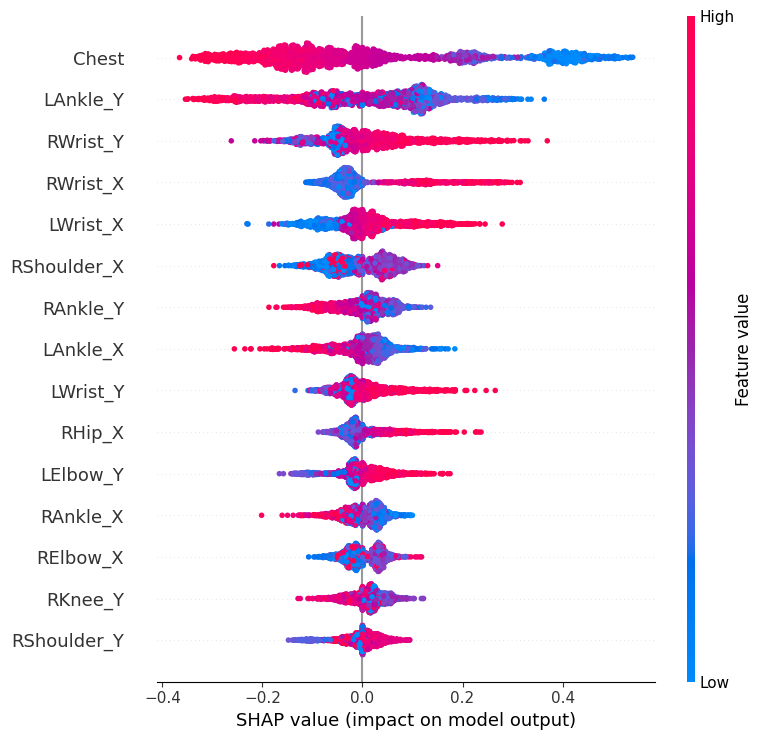

In [25]:
shap_values_2d = np.squeeze(shap_values)


# SHAP 값 시각화
shap.summary_plot(shap_values_2d, X_double_test, feature_names=feature_columns, max_display=15)
plt.show()

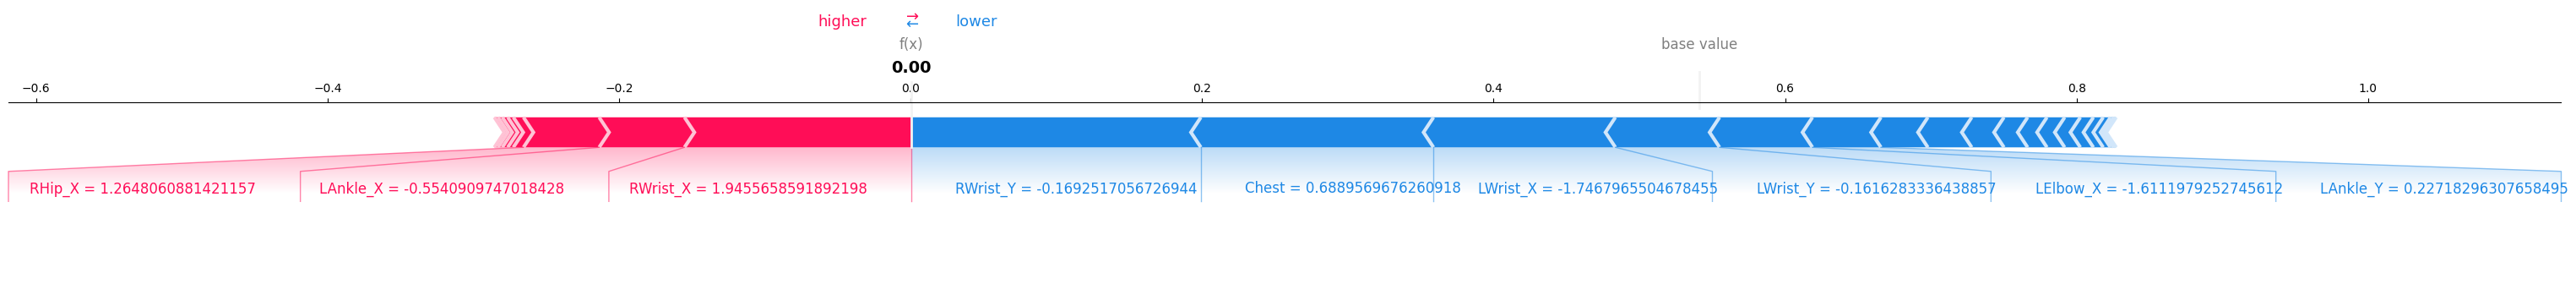

In [21]:
# Force plot 시각화 (테스트 데이터 첫 번째 샘플)
shap.force_plot(explainer.expected_value, shap_values_2d[3], X_double_test[3], matplotlib=True, figsize=(39, 3), feature_names=feature_columns)
plt.show()